# PROYECTO FINAL

## - Anderson Ramírez 
## - Camilo Jiménez

##  <font color="PURPLE"> PARTE 1 - ANÁLISIS SUPERVISADO </font> ##


### ANÁLISIS DE DATOS

In [864]:
import warnings
warnings.filterwarnings('always') 

In [881]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes, neighbors
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression # modelos lineales
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model , tree
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import KFold, cross_val_score, cross_validate, StratifiedKFold, RepeatedKFold, LeaveOneOut #protocolo de evaluación
from sklearn import datasets, metrics, svm
from sklearn.metrics import mean_squared_error, r2_score, calinski_harabaz_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
import math
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [866]:
d = pd.read_csv("PF-02-DatosTelco.csv", delimiter = ",")

In [5]:
d.shape

(23162, 9)

In [6]:
d.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,RETIRADO,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,RETIRADO,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESTADO              23162 non-null  object 
 1   INGRESOS            23162 non-null  int64  
 2   CASA                23162 non-null  float64
 3   PRECIO_DISPOSITIVO  23162 non-null  float64
 4   MESES               23162 non-null  int64  
 5   DURACION            23162 non-null  float64
 6   SOBRECARGO          23162 non-null  float64
 7   SALDO_RESTANTE      23162 non-null  float64
 8   SATISFACCION        23162 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


In [8]:
d.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ESTADO,23162,2,RETIRADO,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INGRESOS,23162,NaN,NaN,NaN,4.81312e+06,2.73737e+06,150000,2.1563e+06,6.13755e+06,7.34718e+06,9.65e+06
CASA,23162,NaN,NaN,NaN,7.16144e+08,4.81155e+08,8e+07,3.57e+08,6.24e+08,9.0775e+08,2.18e+09
PRECIO_DISPOSITIVO,23162,NaN,NaN,NaN,1.31534e+06,748570,200000,657184,1.23746e+06,1.82958e+06,4.7e+06
MESES,23162,NaN,NaN,NaN,24.1971,14.264,0,14,24,34,79
DURACION,23162,NaN,NaN,NaN,9.60985,7.04001,0,2.1,14.6,16.1,20.1
SOBRECARGO,23162,NaN,NaN,NaN,110.056,100.772,0,12.5669,75.3836,201.55,411.168
SALDO_RESTANTE,23162,NaN,NaN,NaN,42.9919,30.2045,0,15.2,37.65,70,130.7
SATISFACCION,23162,NaN,NaN,NaN,5.48084,2.80994,0.61358,2.7055,4.06455,8.26824,9.64262


**1. ¿Encuentra alguna anomalía en los datos?** <font color="RED"> (0.3) </font>

### CAMBIO DE TIPOS DE VARIABLE

Procedemos a modificar los tipos de la variable **SATISFACCIÓN**, ya que esta nos arroja valores de una encuesta, y estos valores deberían ser de tipo entero.

De igual manera cambiamos los tipos de variable para las columnas **CASA** y **PRECIO DISPOSITIVO** para mejorar la visualización de estos en la tabla.

In [9]:
d.SATISFACCION = d.SATISFACCION.astype(np.int64)

In [10]:
d.CASA = d.CASA.astype(np.int64)

In [11]:
d.PRECIO_DISPOSITIVO = d.PRECIO_DISPOSITIVO.astype(np.int64)

In [12]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESTADO              23162 non-null  object 
 1   INGRESOS            23162 non-null  int64  
 2   CASA                23162 non-null  int64  
 3   PRECIO_DISPOSITIVO  23162 non-null  int64  
 4   MESES               23162 non-null  int64  
 5   DURACION            23162 non-null  float64
 6   SOBRECARGO          23162 non-null  float64
 7   SALDO_RESTANTE      23162 non-null  float64
 8   SATISFACCION        23162 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.6+ MB


In [13]:
d.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,883000000,1444153,26,2.3,11.167542,20.3,1
1,VINCULADO,8574088,1745000000,2157661,23,3.7,0.000000,53.5,3
2,RETIRADO,795993,95000000,452809,38,16.8,350.610224,13.9,8
3,RETIRADO,8115015,83000000,2617184,37,17.6,230.913888,45.7,8
4,RETIRADO,8187499,677000000,666069,19,0.0,131.541983,67.2,8


### MODELO DE REFERENCIA (BASELINE)

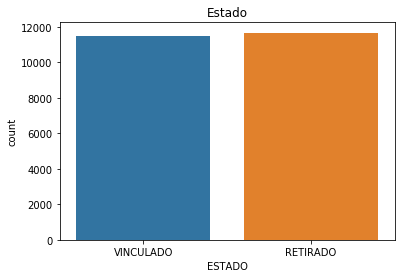

In [14]:
ax = sns.countplot(x=d.ESTADO, data=d)
plt.title("Estado")
plt.show()

In [15]:
pd.crosstab(index=d["ESTADO"], columns="count")

col_0,count
ESTADO,
RETIRADO,11665
VINCULADO,11497


In [16]:
d.ESTADO[d.ESTADO=="RETIRADO"].aggregate('count') / d.shape[0] * 100

50.362662982471285

El baseline global es entonces de: **50.4% de ACCURACY**, favoreciendo ligeramente a la clase **RETIRADO** que indica que las personas se retiraron de la compañía

----------------------------------------------------------**Ingreso: - el minimo puede ser un atipico inferior (hacer diagrama de bigote)
Precio dispositivo: - Precio del dispositivo es más caro que el salario minimo
Duración sorbrecargo: - Posible solución ampliar el plan de minutos ya que el sobrecargo es mucho mayor** --------------------------------------------
            

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### REVISION DE DATOS ANÓMALOS (GRÁFICAMENTE)

**2. La empresa considera que los valores de variables que estén a más de 4 desviaciones estándar del promedio deberían ser consideradas excepcionales, y por lo tanto no se deben considerar en los análisis. Identifíquelas y apártelas del dataset <font color="RED"> (0.3) </font> (ES DECIR 4 a cada lado del promedio)**

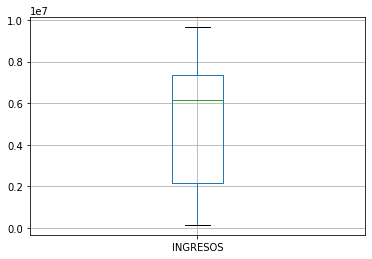

In [17]:
Ibx = d.boxplot(column='INGRESOS');

In [18]:
d.INGRESOS.sort_values()

21686     150000
6386      150000
12108     150000
7199      150000
10192     150000
          ...   
19642    9248725
5778     9250544
14835    9303849
9579     9465272
11025    9650000
Name: INGRESOS, Length: 23162, dtype: int64

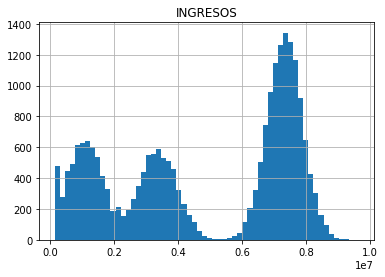

<Figure size 432x288 with 0 Axes>

In [19]:
plt.title('INGRESOS')
plt.hist(d.INGRESOS, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

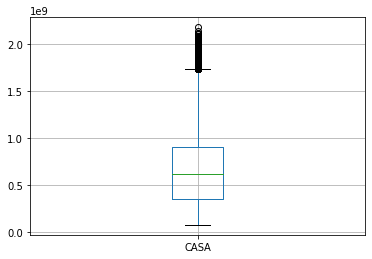

In [20]:
Ibx = d.boxplot(column='CASA');

In [21]:
d.CASA.sort_values()

5373       80000000
17065      81000000
9867       81000000
19146      81000000
19306      81000000
            ...    
1059     2105000000
13576    2109000000
8207     2121000000
20022    2144000000
13699    2180000000
Name: CASA, Length: 23162, dtype: int64

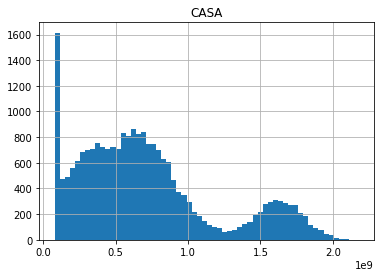

<Figure size 432x288 with 0 Axes>

In [22]:
plt.title('CASA')
plt.hist(d.CASA, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

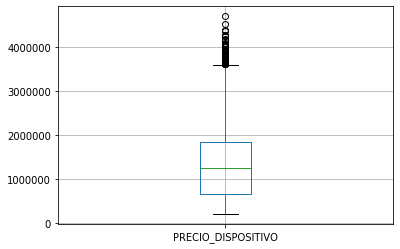

In [23]:
Ibx = d.boxplot(column='PRECIO_DISPOSITIVO');

In [24]:
d.PRECIO_DISPOSITIVO.sort_values()

21777     200000
14356     203799
10632     205855
13122     211759
22870     213877
          ...   
20503    4275175
21449    4355809
18018    4391288
8003     4531737
18689    4700000
Name: PRECIO_DISPOSITIVO, Length: 23162, dtype: int64

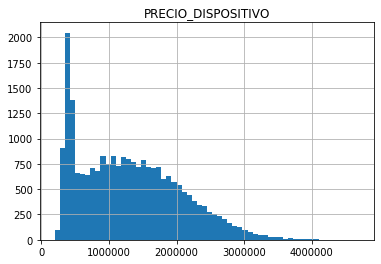

<Figure size 432x288 with 0 Axes>

In [25]:
plt.title('PRECIO_DISPOSITIVO')
plt.hist(d.PRECIO_DISPOSITIVO, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

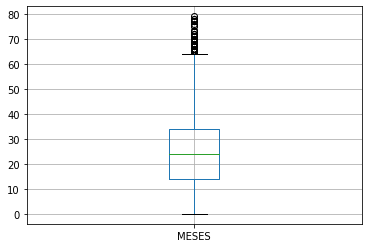

In [26]:
Ibx = d.boxplot(column='MESES');

In [27]:
d.MESES.sort_values()

23161     0
6031      0
6047      0
18389     0
6064      0
         ..
7802     77
22035    77
19473    78
2204     78
11688    79
Name: MESES, Length: 23162, dtype: int64

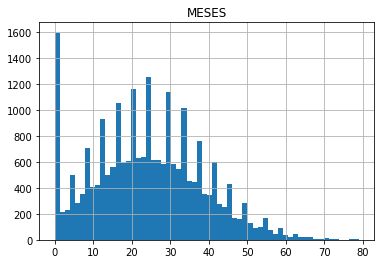

<Figure size 432x288 with 0 Axes>

In [28]:
plt.title('MESES')
plt.hist(d.MESES, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

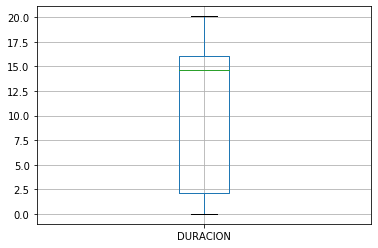

In [29]:
Ibx = d.boxplot(column='DURACION');

In [30]:
d.DURACION.sort_values()

1183      0.0
10840     0.0
8863      0.0
22017     0.0
14843     0.0
         ... 
1904     19.5
4860     19.5
7554     19.6
9041     20.1
19832    20.1
Name: DURACION, Length: 23162, dtype: float64

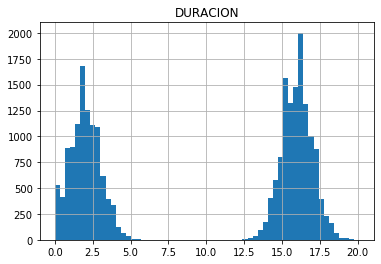

<Figure size 432x288 with 0 Axes>

In [31]:
plt.title('DURACION')
plt.hist(d.DURACION, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

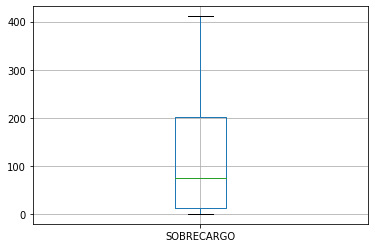

In [32]:
Ibx = d.boxplot(column='SOBRECARGO');

In [33]:
d.SOBRECARGO.sort_values()

15239      0.0000
15585      0.0000
15599      0.0000
3411       0.0000
9233       0.0000
           ...   
11558    394.3928
6194     396.7054
16487    408.8609
4655     409.6595
14204    411.1684
Name: SOBRECARGO, Length: 23162, dtype: float64

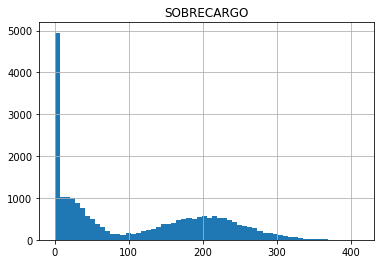

<Figure size 432x288 with 0 Axes>

In [34]:
plt.title('SOBRECARGO')
plt.hist(d.SOBRECARGO, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

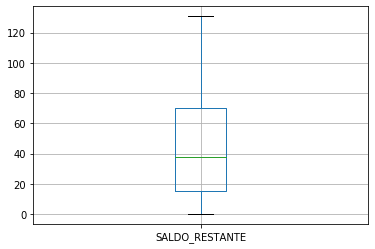

In [35]:
Ibx = d.boxplot(column='SALDO_RESTANTE');

In [36]:
d.SALDO_RESTANTE.sort_values()

21906      0.0
18105      0.0
11110      0.0
11112      0.0
11131      0.0
         ...  
20373    122.1
19293    123.5
9621     127.6
11331    129.7
21129    130.7
Name: SALDO_RESTANTE, Length: 23162, dtype: float64

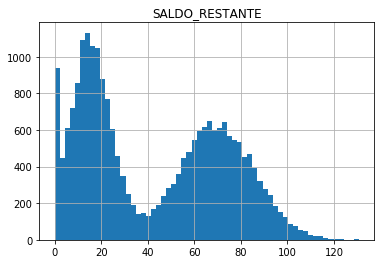

<Figure size 432x288 with 0 Axes>

In [37]:
plt.title('SALDO_RESTANTE')
plt.hist(d.SALDO_RESTANTE, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

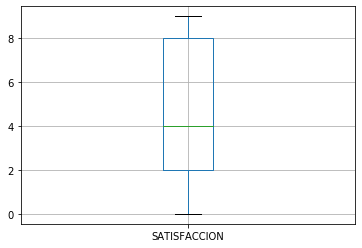

In [38]:
Ibx = d.boxplot(column='SATISFACCION');

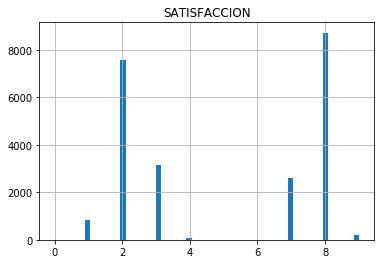

<Figure size 432x288 with 0 Axes>

In [39]:
plt.title('SATISFACCION')
plt.hist(d.SATISFACCION, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

In [40]:
np.std(d.CASA)

481144737.20183754

In [41]:
np.mean(d.CASA)

716143510.9230636

In [42]:
np.min(d.CASA)

80000000

In [43]:
np.max(d.CASA)

2180000000

In [44]:
mini = 716143510.9230636 -(4 * 481144737.20183355)
mini

-1208435437.8842707

In [45]:
maxi = 716143510.9230636 +(4 * 481144737.20183355)
maxi

2640722459.7303977

OK para **CASA**

----

In [46]:
np.std(d.INGRESOS)

2737314.8515588758

In [47]:
np.mean(d.INGRESOS)

4813115.298031258

In [48]:
np.min(d.INGRESOS)

150000

In [49]:
np.max(d.INGRESOS)

9650000

In [50]:
minIng = 4813115.298031258 - (4*2737314.8515588813)
minIng

-6136144.108204267

In [51]:
maxIng = 4813115.298031258 + (4*2737314.8515588813)
maxIng

15762374.704266783

OK para **INGRESOS**

----

In [52]:
np.std(d.PRECIO_DISPOSITIVO)

748553.8820994615

In [53]:
np.mean(d.PRECIO_DISPOSITIVO)

1315340.1737328384

In [54]:
np.min(d.PRECIO_DISPOSITIVO)

200000

In [55]:
np.max(d.PRECIO_DISPOSITIVO)

4700000

In [56]:
minPD = 1315340.1737328384 - (4 * 748553.8820994638)
minPD

-1678875.354665017

In [57]:
maxPD = 1315340.1737328384 + (4 * 748553.8820994638)
maxPD

4309555.702130694

Aquí vemos algo interesante,y es que hay valores **EXCEPCIONALES** dentro de la columna **PRECIO_DISPOSITIVO** , porque se encuentren por fuera de 4 desviaciones estandar del promedio.  

Identificaremos los valores que esten por encima de **maxPD** y posteriormente los apartaremos del dataset.

In [58]:
d[d.PRECIO_DISPOSITIVO > 4309555.702130694]

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
8003,VINCULADO,3514671,901000000,4531737,1,2.1,0.000000,19.8,2
18018,VINCULADO,3402755,1069000000,4391288,40,4.1,16.754480,30.3,2
18689,VINCULADO,8644443,1780000000,4700000,62,0.7,4.720868,78.9,2
21449,RETIRADO,3059382,724000000,4355809,43,2.8,99.469860,26.0,8


Se puede ver que hay 4 registros que estan por encima de **maxPD**

Por consideración de la empresa estos 4 registros que están por fuera de las 4 desviaciones estandares no serán tomados en cuenta y se borraran ya que no son significativos para el data set que tenemos.

In [59]:
d = d[d.PRECIO_DISPOSITIVO < 4309555.702130694]

In [60]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23158 entries, 0 to 23161
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESTADO              23158 non-null  object 
 1   INGRESOS            23158 non-null  int64  
 2   CASA                23158 non-null  int64  
 3   PRECIO_DISPOSITIVO  23158 non-null  int64  
 4   MESES               23158 non-null  int64  
 5   DURACION            23158 non-null  float64
 6   SOBRECARGO          23158 non-null  float64
 7   SALDO_RESTANTE      23158 non-null  float64
 8   SATISFACCION        23158 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.8+ MB


Decidimos borrarlos y trabajar con 23158 registros.

In [61]:
np.max(d.PRECIO_DISPOSITIVO)

4275175

Ahora el Máximo valor de **PRECIO_DISPOSITIVO** si se encuentra dentro de las 4 desviaciones estandar del promedio. No hay más valores excepcionales.

----

In [62]:
np.std(d.MESES)

14.26104713427855

In [63]:
np.mean(d.MESES)

24.195008204508163

In [64]:
np.min(d.MESES)

0

In [65]:
np.max(d.MESES)

79

In [66]:
minM = 24.197133235471895 - ( 4* 14.263706529639602)
minM

-32.857692883086514

In [67]:
maxM = 24.197133235471895 + ( 4* 14.263706529639602)
maxM

81.2519593540303

OK para **MESES**

----

In [68]:
np.std(d.DURACION)

7.039811407003574

In [69]:
np.mean(d.DURACION)

9.611093358666544

In [70]:
np.min(d.DURACION)

0.0

In [71]:
np.max(d.DURACION)

20.1

In [72]:
minD = 9.609852344357137 - ( 4 * 7.039855305252643)
minD

-18.549568876653435

In [73]:
maxD = 9.609852344357137 + ( 4 * 7.039855305252643)
maxD

37.76927356536771

OK para **DURACION**

----

In [74]:
np.std(d.SOBRECARGO)

100.77116774104141

In [75]:
np.mean(d.SOBRECARGO)

110.07008272436578

In [76]:
np.min(d.SOBRECARGO)

0.0

In [77]:
np.max(d.SOBRECARGO)

411.1684

In [78]:
minSC = 110.05629569721388 - (  4 * 100.76932765532113)
minSC

-293.02101492407064

In [79]:
maxSC = 110.05629569721388 + (  4 * 100.76932765532113)
maxSC

513.1336063184984

OK para **SOBRECARGO**

----

In [80]:
np.std(d.SALDO_RESTANTE)

30.20486857050609

In [81]:
np.mean(d.SALDO_RESTANTE)

42.992620260817084

In [82]:
np.min(d.SALDO_RESTANTE)

0.0

In [83]:
np.max(d.SALDO_RESTANTE)

130.7

In [84]:
minSR = 42.991887574475435 - ( 4 * 30.203887816064174)
minSR

-77.82366368978126

In [85]:
maxSR = 42.991887574475435 + ( 4 * 30.203887816064174)
maxSR

163.80743883873214

OK para **SALDO_RESTANTE**

----

In [86]:
np.std(d.SATISFACCION)

2.8382330264795868

In [87]:
np.mean(d.SATISFACCION)

4.990284135072113

In [88]:
np.min(d.SATISFACCION)

0

In [89]:
np.max(d.SATISFACCION)

9

In [90]:
minS = 5.4808397392309285 - ( 4 * 2.8098768872956215) 
minS

-5.758667809951557

In [91]:
maxS = 5.4808397392309285 + ( 4 * 2.8098768872956215)
maxS

16.720347288413414

OK para **SATISFACCION**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**3. Analice la correlación entre las variables y explique lo que puede implicar desde el punto de vista de PCA. <font color="RED"> (0.2) </font>**

Vamos a gráficar una matriz de correlaciones. 

In [119]:
d.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,883000000,1444153,26,2.3,11.167542,20.3,1
1,VINCULADO,8574088,1745000000,2157661,23,3.7,0.000000,53.5,3
2,RETIRADO,795993,95000000,452809,38,16.8,350.610224,13.9,8
3,RETIRADO,8115015,83000000,2617184,37,17.6,230.913888,45.7,8
4,RETIRADO,8187499,677000000,666069,19,0.0,131.541983,67.2,8


In [120]:
# Calculamos la matriz de correlaciones
#corr = dataframe_X.corr()
#corr

pearsoncorr = d.corr(method='pearson')
pearsoncorr

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
INGRESOS,1.000000,0.384465,-0.006736,-0.005715,-0.158182,-0.000666,0.844883,0.001710
CASA,0.384465,1.000000,0.001439,-0.002846,-0.063700,0.003249,0.326608,0.002172
PRECIO_DISPOSITIVO,-0.006736,0.001439,1.000000,-0.001461,0.011556,0.005013,-0.004230,-0.000521
MESES,-0.005715,-0.002846,-0.001461,1.000000,0.007094,0.004717,-0.003614,0.003503
DURACION,-0.158182,-0.063700,0.011556,0.007094,1.000000,0.001898,0.046901,0.001679
SOBRECARGO,-0.000666,0.003249,0.005013,0.004717,0.001898,1.000000,0.002447,0.886345
SALDO_RESTANTE,0.844883,0.326608,-0.004230,-0.003614,0.046901,0.002447,1.000000,0.003516
SATISFACCION,0.001710,0.002172,-0.000521,0.003503,0.001679,0.886345,0.003516,1.000000


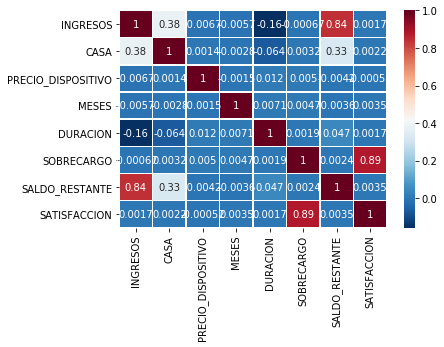

In [121]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

### <font color="BLUE"> ANÁLISIS DE LA MATRIZ DE CORRELACIONES </font>


Aquí analizaremos la correlación entre las variables según el gráfico anterior. De igual manera explicaremos dichos resultados cómo pueden reflejarse en los resultados de nuestro PCA (donde cada componente principal explica en un % las variables del dataset) : 


<font color="GREEN"> FAMILIA 1 </font> > SOBRECARGO - SATISFACCION  (CORRELACION FUERTE ENTRE ELLAS)

<font color="GREEN"> FAMILIA 2 </font> > INGRESOS - SALDO_RESTANTE  (CORRELACION FUERTE ENTRE ELLAS)


Como podemos observar en la matriz de correlaciones, hay dos familias, las cuales indica multicolinealidad entre las variables pertenecientes a esa familia, evidenciadas por una figuras geometricas cuadradas.


<font color="GREEN"> En este orden de ideas podemos preveer PC1 como la correlación de SOBRECARGO y SATISFACCIÓN, porque muestra una correlación muy alta entre estas dos variables (89%), de igual manera también podemos preveer nuestro PC2 como la correlación entre INGRESOS y SALDO_RESTANTE, porque muestra una correlación muy alta entre estas dos variables (84%).  Entonces, a nivel de PCA podemos decir que cuando enfrentamos un gran conjunto de variables correlacionadas, los componentes principales permiten resumir este conjunto con un número menor de variables representativas que explican la mayor parte de la variabilidad en el dataset original, en este caso mostraria que las variables SOBRECARGO y SATISFACCION pueden ser nuestro PC1 y las variables INGRESOS y SALDO_RESTANTE pueden ser nuestro PC2.</font> 


<font color="GREEN"> Por último, podemos aprovechar uno de estos componentes principales para usarlos como predictores en un modelo de regresión en lugar del conjunto original de variables más grandes </font> 


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**4. Debe entrenar 3 tipos de modelos predictivos de diferentes familias:** 


**Defina el protocolo de evaluación que va a utilizar para calibrar los modelos y estimar la calidad del modelo final**  <font color="RED"> (0.3) </font> **

**Establezca las métricas que va a utilizar, justificando su escogencia**  <font color="RED"> (0.2) </font> 


**Calibre 3 tipos de modelos diferentes: K-NN, árbol de decisión (regresión escogimos) algún otro que propongan, utilizando las métricas y protocolo definido**  <font color="RED"> (1.0) </font> 


**Evalúe los 3 modelos encontrados, escoja el mejor, explicando y concluyendo lo que encontró, utilizando las métricas y protocolo definido**  <font color="RED"> (0.5) </font> 


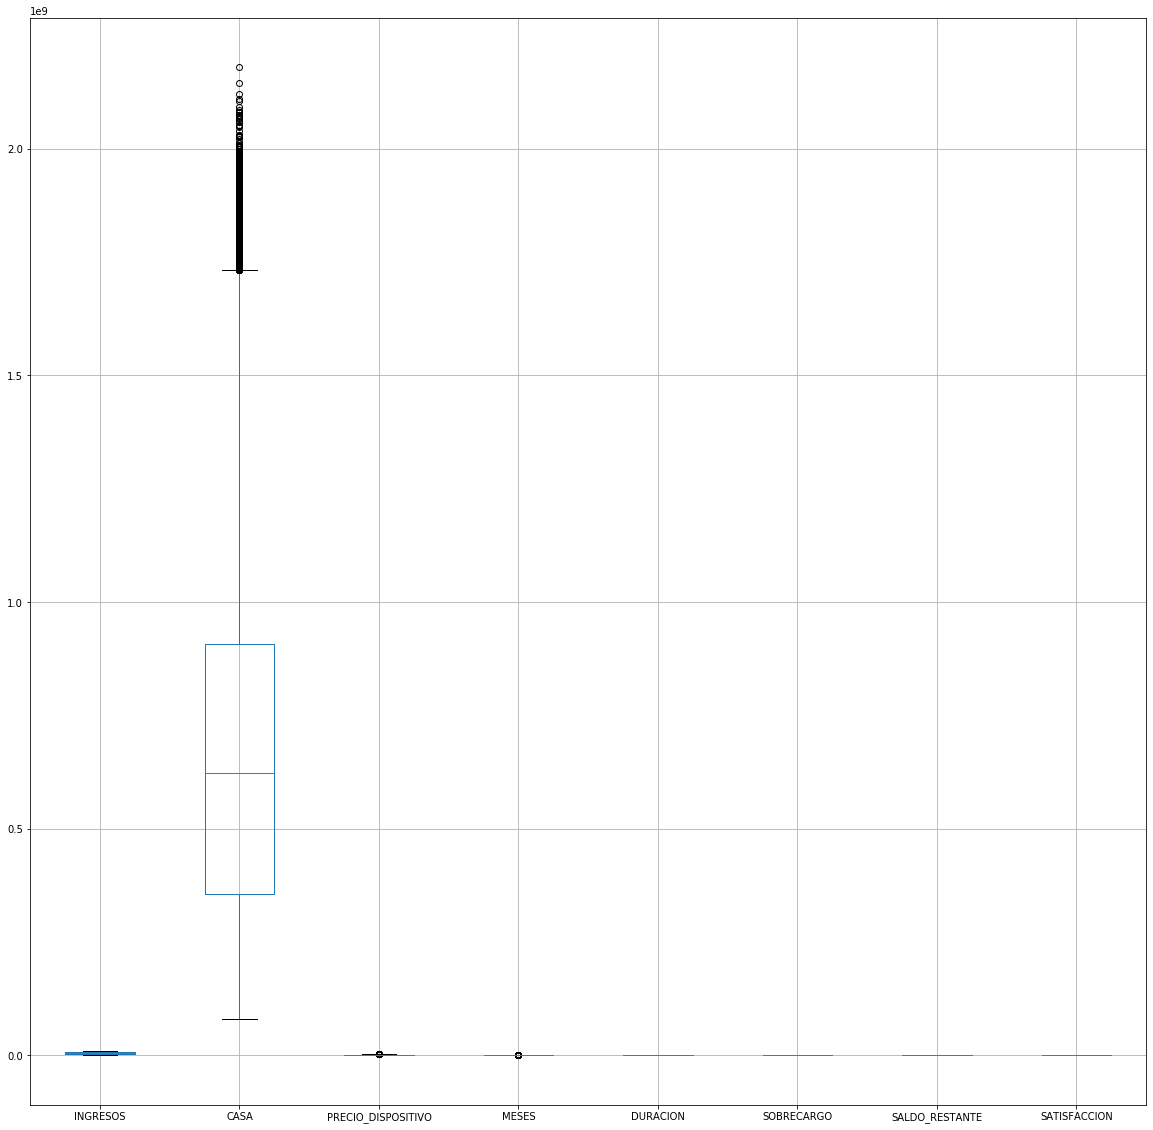

In [122]:
plt.figure(figsize=(20,20))
d.boxplot()

En la gráfica podemos ver que hay escalas diferentes entre la variable **CASA** y las demás, es necesario **NORMALIZAR** para su posterior uso. Además de lo anterior, también normalizamos para que todas las variables tengan la misma importancia.

## NORMALIZACION

In [123]:
d_normalizadoSupervisado = d.copy()

<font color="BLUE"> este el DATAFRAME normalizado. </font> 

In [124]:
scaler = preprocessing.StandardScaler()

In [125]:
d_normalizadoSupervisado.columns

Index(['ESTADO', 'INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')

Escogeremos solo las variables numericas para su **NORMALIZACION**. Variables categoricas no se tendran en cuenta por ahora

In [126]:
d_normalizadoSupervisado[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']] = scaler.fit_transform(d_normalizadoSupervisado[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']])

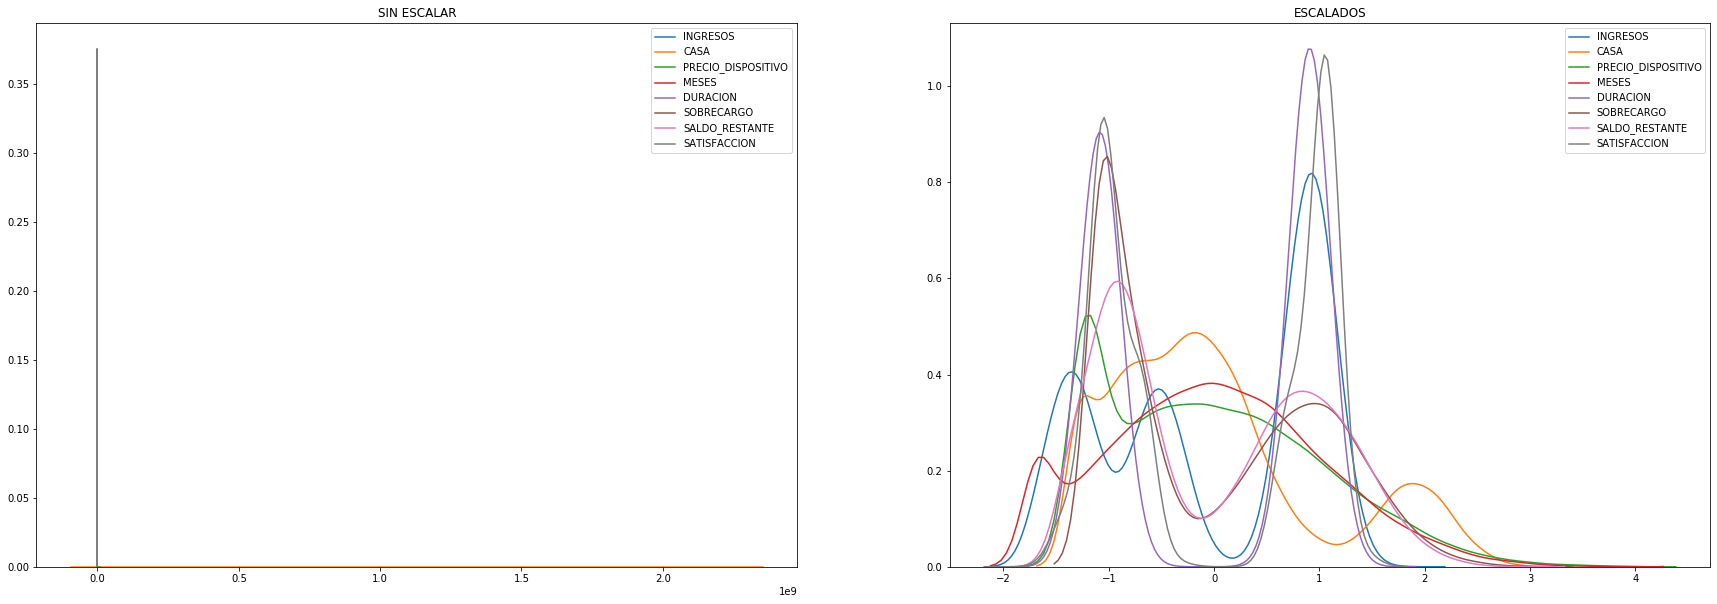

In [127]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize =(30,10))
ax1.set_title("SIN ESCALAR")
sns.kdeplot(d.INGRESOS, ax = ax1)
sns.kdeplot(d.CASA, ax = ax1)
sns.kdeplot(d.PRECIO_DISPOSITIVO, ax = ax1)
sns.kdeplot(d.MESES, ax = ax1)
sns.kdeplot(d.DURACION, ax = ax1)
sns.kdeplot(d.SOBRECARGO, ax = ax1)
sns.kdeplot(d.SALDO_RESTANTE, ax = ax1)
sns.kdeplot(d.SATISFACCION, ax = ax1)


ax2.set_title("ESCALADOS")
sns.kdeplot(d_normalizadoSupervisado.INGRESOS,  ax = ax2)
sns.kdeplot(d_normalizadoSupervisado.CASA,  ax = ax2)
sns.kdeplot(d_normalizadoSupervisado.PRECIO_DISPOSITIVO,  ax = ax2)
sns.kdeplot(d_normalizadoSupervisado.MESES,  ax = ax2)
sns.kdeplot(d_normalizadoSupervisado.DURACION,  ax = ax2)
sns.kdeplot(d_normalizadoSupervisado.SOBRECARGO,  ax = ax2)
sns.kdeplot(d_normalizadoSupervisado.SALDO_RESTANTE,  ax = ax2)
sns.kdeplot(d_normalizadoSupervisado.SATISFACCION,  ax = ax2)

**OBSERVACIONES** :

En el primer GRÁFICO tenemos los datos sin normalizar

En el segundo tenemos los datos normalizados, se evidencia que en algunas variables existen distribuciones normales (forma de campana), salvo algunas que tienen 2.

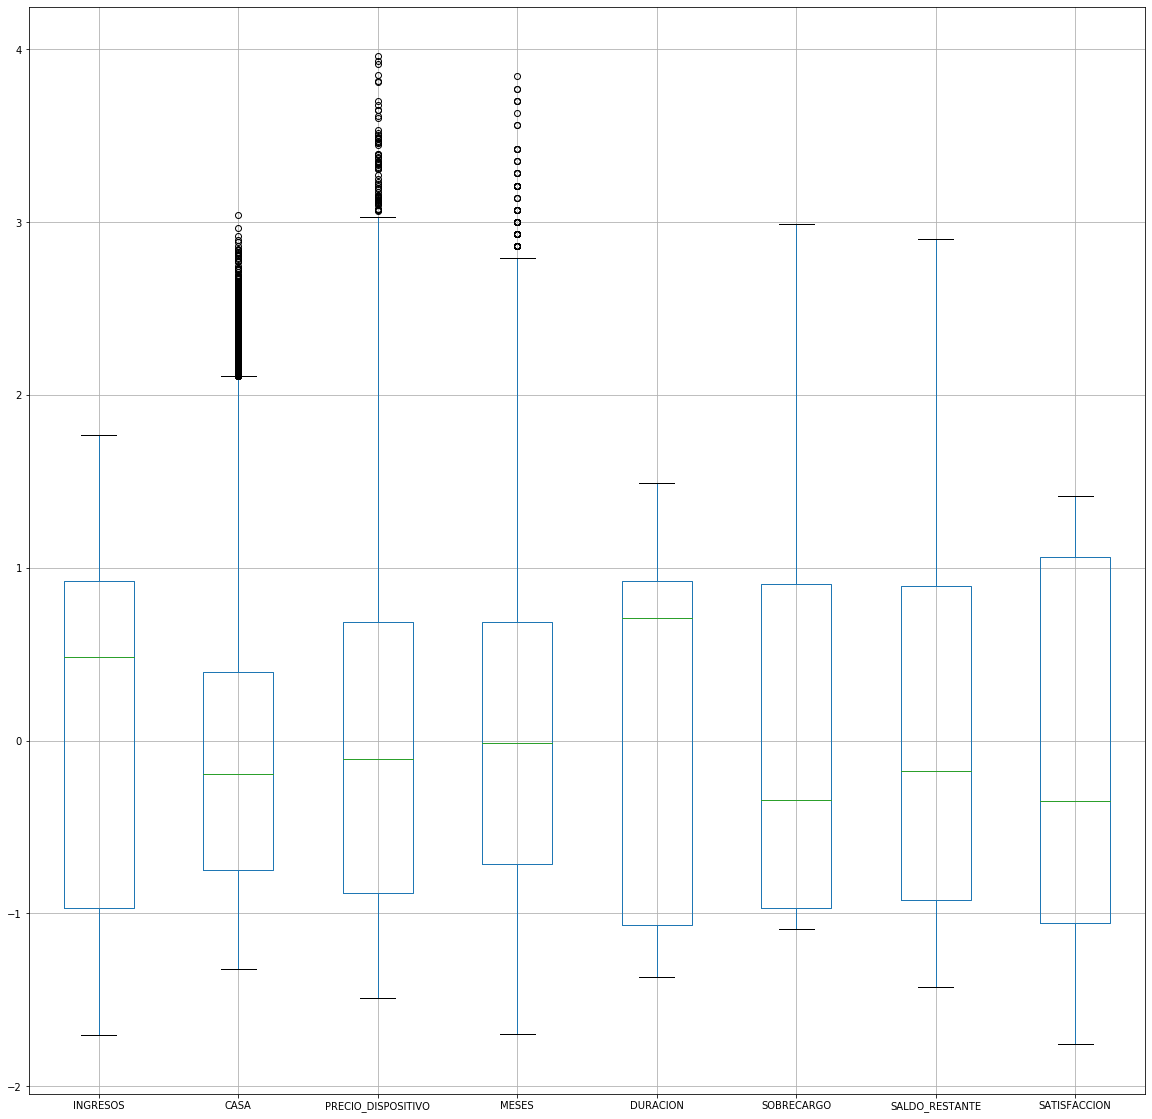

In [128]:
plt.figure(figsize=(20,20))
d_normalizadoSupervisado.boxplot()

**ANTES DE EMPEZAR A HACER LOS MODELOS PREDICTIVOS, ES NECESARIO CAMBIAR EL TIPO DE LA VARIABLE ESTADO, PARA PODER TRABAJAR CON ELLA EN LOS MODELOS**.

    0 será VINCULADO
    1 será RETIRADO

In [129]:
d_normalizadoSupervisado.loc[(d_normalizadoSupervisado.ESTADO == "VINCULADO"),"ESTADO"]=0
d_normalizadoSupervisado.loc[(d_normalizadoSupervisado.ESTADO == "RETIRADO"),"ESTADO"]=1

In [130]:
d_normalizadoSupervisado.ESTADO = d_normalizadoSupervisado.ESTADO.astype(np.int64)

In [131]:
d_normalizadoSupervisado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23158 entries, 0 to 23161
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESTADO              23158 non-null  int64  
 1   INGRESOS            23158 non-null  float64
 2   CASA                23158 non-null  float64
 3   PRECIO_DISPOSITIVO  23158 non-null  float64
 4   MESES               23158 non-null  float64
 5   DURACION            23158 non-null  float64
 6   SOBRECARGO          23158 non-null  float64
 7   SALDO_RESTANTE      23158 non-null  float64
 8   SATISFACCION        23158 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.8 MB


In [132]:
d_normalizadoSupervisado.head(3)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,0,-0.269711,0.346947,0.173071,0.126568,-1.038535,-0.981457,-0.751290,-1.405904
1,0,1.373920,2.138569,1.127662,-0.083795,-0.839666,-1.092278,0.347870,-0.701241
2,1,-1.467515,-1.290870,-1.153232,0.968021,1.021179,2.386994,-0.963177,1.060419


-----------------------------------------------------------------------------------------------------------------

## <font color="BLUE"> MODELOS PREDICTIVOS </font>

## <font color="GREEN"> REGRESIÓN LOGISTICA </font>

un algoritmo de clasificación por lo que la utilizamos para predecir entre dos opciones.

## <font color="GREEN"> CON TODAS LAS VARIABLES </font>

In [901]:
v_independientes_rlg = ['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']
v_dependientes_rlg = ['ESTADO']

In [902]:
d_independientes_rlg = d_normalizadoSupervisado[v_independientes_rlg]
d_dependientes_rlg = d_normalizadoSupervisado[v_dependientes_rlg]

Necesitamos 1d array para poder probar el KNN, así que pasamos d_dependientes_knn a 1D array

In [903]:
d_ndarray_rlg = d_dependientes_rlg.values

In [904]:
d_ndarray_rlg = d_ndarray_rlg.ravel()

In [905]:
d_independientes_rlg.head(3)

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,-0.269711,0.346947,0.173071,0.126568,-1.038535,-0.981457,-0.751290,-1.405904
1,1.373920,2.138569,1.127662,-0.083795,-0.839666,-1.092278,0.347870,-0.701241
2,-1.467515,-1.290870,-1.153232,0.968021,1.021179,2.386994,-0.963177,1.060419


In [906]:
d_dependientes_rlg.head(3)

,ESTADO
0,0
1,0
2,1


In [907]:
d_dependientes_rlg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23158 entries, 0 to 23161
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ESTADO  23158 non-null  int64
dtypes: int64(1)
memory usage: 361.8 KB


**Usaremos el <font color="RED"> PROTOCOLO HOLDOUT</font> estratificado <font color="RED"> 70% training</font> y <font color="RED"> 30% test</font> >>**

In [908]:
train_x_rlg, test_x_rlg, train_y_rlg, test_y_rlg = train_test_split(d_independientes_rlg, d_ndarray_rlg , test_size=0.3, random_state=12345,stratify = d_ndarray_rlg)

In [909]:
regrl_log = LogisticRegression()
regrl_log.fit(train_x_rlg,train_y_rlg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [915]:
for var, coef in zip(v_independientes_rlg, np.squeeze(regrl_log.coef_)):
    print("{}: {}".format(var, coef))
print("intercepción: {}".format(np.squeeze(regrl_log.intercept_)))

INGRESOS: 0.005026543773953186
CASA: -0.029295573357154155
PRECIO_DISPOSITIVO: -0.02821485446406708
MESES: -0.050153598040910345
DURACION: 0.012178638566194307
SOBRECARGO: 0.36429312038854156
SALDO_RESTANTE: -0.00487205468751423
SATISFACCION: 1.9514314040659622
intercepción: 0.04663188533719802


In [916]:
train_y_pred_rlg = regrl_log.predict(train_x_rlg)
test_y_pred_rlg = regrl_log.predict(test_x_rlg)
print(train_y_pred_rlg.shape)
print(test_y_pred_rlg.shape)

(16210,)
(6948,)


**A continuación las <font color="RED"> MÉTRICAS </font> del modelo >>**

In [911]:
print("MSE (train): %.4f" % mean_squared_error(train_y_rlg, train_y_pred_rlg))
print("MSE (test) : %.4f" % mean_squared_error(test_y_rlg, test_y_pred_rlg))
print('R2  (train): %.4f' % r2_score(train_y_rlg, train_y_pred_rlg))
print('R2  (test) : %.4f' % r2_score(test_y_rlg, test_y_pred_rlg))

MSE (train): 0.0940
MSE (test) : 0.0946
R2  (train): 0.6239
R2  (test) : 0.6217


In [912]:
r2_aj_train = 1 - (1-r2_score(train_y_rlg, train_y_pred_rlg))*(len(train_y_rlg)-1) / (len(train_y_rlg) - train_x_rlg.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(test_y_rlg, test_y_pred_rlg))*(len(test_y_rlg)-1) / (len(test_y_rlg) - test_x_rlg.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

R2 adj (train): 0.6237
R2 adj (test): 0.6213


In [913]:
cm = metrics.confusion_matrix(test_y_rlg, test_y_pred_rlg)
print(cm)

[[3138  310]
 [ 347 3153]]


In [914]:
print('clases: ', regrl_log.classes_)
print("Exactitud: ", metrics.accuracy_score(test_y_rlg, test_y_pred_rlg))
print("Kappa    : ", metrics.cohen_kappa_score(test_y_rlg, test_y_pred_rlg))
print("Precisión     : ", metrics.precision_score(test_y_rlg, test_y_pred_rlg, d_dependientes_rlg.ESTADO==0 , average='macro'))
print("Recall        : ", metrics.recall_score(test_y_rlg, test_y_pred_rlg, d_dependientes_rlg.ESTADO==0, average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(test_y_rlg, test_y_pred_rlg, d_dependientes_rlg.ESTADO==0, average='macro'))

clases:  [0 1]
Exactitud:  0.905440414507772
Kappa    :  0.810885310600862
Precisión     :  0.9054194338520697
Recall        :  0.9055088740737743
Especificidad :  0.9104822408316489
F1-score      :  0.905438475175874


<font color="ORANGE"> EN REGRESION LOGÍSTICA CON TODAS LAS VARIABLES  TENEMOS UN ACCURACY DEL 90.5% </font>

## <font color="GREEN"> EVALUACIÓN DEL MODELO </font>

Ahora vamos a evaluar el modelo que obtuvimos.

Recordemos que la idea es identificar los clientes propensos a irse a las de la empresas el próximo año.

Por tal motivo solo le pasaremos al **TEST** el dataset filtrado con los clientes que esten en condición de **VINCULADO** 

In [918]:
d_test_rlg = d.copy()

In [919]:
scaler1 = preprocessing.StandardScaler()

In [921]:
d_test_rlg.columns

Index(['ESTADO', 'INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')

In [923]:
d_test_rlg[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']] = scaler1.fit_transform(d_test_rlg[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']])

In [924]:
d_test_rlg = d_test_rlg[d_test_rlg.ESTADO == "VINCULADO"]

In [925]:
d_test_rlg.head(3)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,-0.269708,0.346791,0.172082,0.126395,-1.038353,-0.981338,-0.751290,-1.323178
1,VINCULADO,1.373964,2.138351,1.125264,-0.083929,-0.839485,-1.092161,0.347906,-0.754330
5,VINCULADO,0.890329,-0.607184,-1.024942,-0.364361,-1.052557,-1.092161,0.960410,-1.246065


Entonces ya no necesitamos la columna **ESTADO**, porque todos nuestros registros son de **CLIENTES VINCULADOS**, asi que la borramos.

In [927]:
d_test_rlg = d_test_rlg.drop('ESTADO', axis=1)

In [928]:
d_test_rlg.head(2)

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,-0.269708,0.346791,0.172082,0.126395,-1.038353,-0.981338,-0.751290,-1.323178
1,1.373964,2.138351,1.125264,-0.083929,-0.839485,-1.092161,0.347906,-0.754330


In [929]:
d_test_rlg.shape

(11497, 8)

In [934]:
predicted_clientes_leave_rlg = regrl_log.predict(d_test_rlg)

In [935]:
predicted_clientes_leave_rlg

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

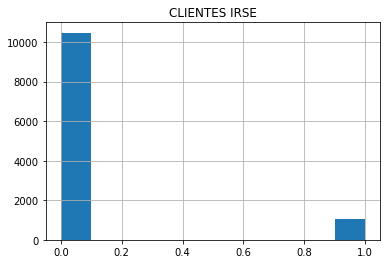

<Figure size 432x288 with 0 Axes>

In [936]:
plt.title('CLIENTES IRSE')
plt.hist(predicted_clientes_leave_rlg, bins = 10)
plt.grid(True)
plt.show()
plt.clf()

In [937]:
clientesAIrse_rlg = predicted_clientes_leave_rlg[predicted_clientes_leave_rlg > 0.5]

In [938]:
clientesAIrse_rlg.shape

(1028,)

####  >> <font color="BLUE"> CONCLUSION DE EVALUCIÓN DEL MODELO </font> <<

<font color="ORANGE">  DECIDIMOS QUE EL 50% ES EL VALOR DETERMINANTE PARA CONSIDERAR QUE UN CLIENTE SE VAYA, YA QUE SI LO PASA HABRÁ MÁS PROBABILIDAD DE IRSE QUE DE QUEDARSE.
    
EN ESE ORDEN DE IDEAS CON NUESTRO MODELO DE REGRESIÓN CON ACCURACY DE 90.5% PUDIMOS DETECTAR QUE HAY 1028 CLIENTES CON RIESGO DE RETIRARSE DE LA COMPAÑÍA </font>

## <font color="GREEN"> ARBOLES DE DECISIÓN </font>

Permiten utilizar tanto las variables predictivas categóricas como las numéricas. No todas las variables van a ser útiles. El árbol se va a encargar de encontrar la mejor variable a utilizar en el contexto del subconjunto de datos de cada rama.

Aquí tenemos dos criterios para empezar, seguir dvidiendo y crear el arbol  **ENTROPY** o **GINI**

## <font color="GREEN"> ARBOL COMPLETO (CON TODAS VARIABLES) </font>

In [365]:
np.random.seed(1234)
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=None,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=2, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para 
    max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)

In [366]:
v_independientes_dt = ['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']
v_dependientes_dt = ['ESTADO']

In [367]:
d_independientes_dt = d_normalizadoSupervisado[v_independientes_dt]
d_dependientes_dt = d_normalizadoSupervisado[v_dependientes_dt]

In [368]:
d_independientes_dt.head(3)

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,-0.269711,0.346947,0.173071,0.126568,-1.038535,-0.981457,-0.751290,-1.405904
1,1.373920,2.138569,1.127662,-0.083795,-0.839666,-1.092278,0.347870,-0.701241
2,-1.467515,-1.290870,-1.153232,0.968021,1.021179,2.386994,-0.963177,1.060419


In [369]:
d_dependientes_dt.head(3)

,ESTADO
0,0
1,0
2,1


In [370]:
d_dependientes_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23158 entries, 0 to 23161
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ESTADO  23158 non-null  int64
dtypes: int64(1)
memory usage: 361.8 KB


**Usaremos el <font color="RED"> PROTOCOLO HOLDOUT</font> estratificado <font color="RED"> 70% training</font> y <font color="RED"> 30% test</font> >>**

In [371]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(d_independientes_dt, d_dependientes_dt, test_size = 0.3, random_state = 1234, stratify = d_dependientes_dt)

In [372]:
ctree.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Una vez el árbol es aprendido, se puede consultar diferentes atributos. El mas interesante, aparte del árbol en sí, es el que asocia un índice de importancia a los atributos independientes en la clasificación:

In [373]:
ctree.feature_importances_

array([0.0709489 , 0.06873859, 0.06953957, 0.05155432, 0.05116633,
       0.06779128, 0.06750808, 0.55275293])

In [374]:
X_train_dt.columns[np.argsort(-ctree.feature_importances_)]

Index(['SATISFACCION', 'INGRESOS', 'PRECIO_DISPOSITIVO', 'CASA', 'SOBRECARGO',
       'SALDO_RESTANTE', 'MESES', 'DURACION'],
      dtype='object')

Se puede observar que **SATISFACCION** es la variable de mayor importancia **(55.3%)** , quiere decir que es la variable con la cual se puede empezar a dividir el arbol de la manera más eficiente, evitando mucha profundidad en la construcción del mismo.

In [375]:
train_y_pred_dt = ctree.predict(X_train_dt)
test_y_pred_dt = ctree.predict(X_test_dt)
print(train_y_pred_dt.shape)
print(test_y_pred_dt.shape)

(16210,)
(6948,)


**A continuación las <font color="RED"> MÉTRICAS </font> del modelo >>**

In [376]:
print("MSE (train): %.4f" % mean_squared_error(y_train_dt, train_y_pred_dt))
print("MSE (test) : %.4f" % mean_squared_error(y_test_dt, test_y_pred_dt))
print('R2  (train): %.4f' % r2_score(y_train_dt, train_y_pred_dt))
print('R2  (test) : %.4f' % r2_score(y_test_dt, test_y_pred_dt))

MSE (train): 0.0000
MSE (test) : 0.1730
R2  (train): 1.0000
R2  (test) : 0.3080


In [679]:
r2_aj_train = 1 - (1-r2_score(y_train_dt, train_y_pred_dt))*(len(y_train_dt)-1) / (len(y_train_dt) - X_train_dt.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(y_test_dt, test_y_pred_dt))*(len(y_test_dt)-1) / (len(y_test_dt) - X_test_dt.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

R2 adj (train): 1.0000
R2 adj (test): 0.3072


In [377]:
cm = metrics.confusion_matrix(y_test_dt, test_y_pred_dt)
print(cm)

[[2866  582]
 [ 620 2880]]


In [378]:

print("Exactitud: ", metrics.accuracy_score(y_test_dt, test_y_pred_dt))
print("Kappa    : ", metrics.cohen_kappa_score(y_test_dt, test_y_pred_dt))
print("Precisión     : ", metrics.precision_score(y_test_dt, test_y_pred_dt, d_dependientes_dt.ESTADO==0 , average='macro'))
print("Recall        : ", metrics.recall_score(y_test_dt, test_y_pred_dt, d_dependientes_dt.ESTADO==0 , average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test_dt, test_y_pred_dt, d_dependientes_dt.ESTADO==0 , average='macro'))

Exactitud:  0.8270005757052389
Kappa    :  0.6540100959583355
Precisión     :  0.82698164122635
Recall        :  0.8270624654722354
Especificidad :  0.8318890814558059
F1-score      :  0.8269973143536401


<font color="ORANGE"> EN ARBOLES DE DECISIÓN CON EL ARBOL COMPLETO TENEMOS UN ACCURACY DEL 82.7% </font>

## <font color="GREEN"> EVALUACIÓN DEL ARBOL COMPLETO </font>

Ya tenemos el modelo "aprendido" con el dataset de 23158 instancias. Vamos ahora a evaluarlo sobre ese mismo dataset para poder ver los éxitos y errores de la predicción.

Ahora vamos a evaluar el modelo.  Recordemos que la idea es identificar los clientes propensos a irse a las de la empresas el próximo año.

Por tal motivo solo le pasaremos al **TEST** el dataset filtrado con los clientes que esten en condición de **VINCULADO** 

In [396]:
d_test_dt = d.copy()

In [397]:
scaler2 = preprocessing.StandardScaler()

In [398]:
d_test_dt.columns

Index(['ESTADO', 'INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')

In [399]:
d_test_dt[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']] = scaler2.fit_transform(d_test_dt[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']])

In [400]:
d_test_dt = d_test_dt[d_test_dt.ESTADO == "VINCULADO"]

In [401]:
d_test_dt.head(3)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,-0.269711,0.346947,0.173071,0.126568,-1.038535,-0.981457,-0.751290,-1.405904
1,VINCULADO,1.373920,2.138569,1.127662,-0.083795,-0.839666,-1.092278,0.347870,-0.701241
5,VINCULADO,0.890297,-0.607060,-1.025722,-0.364280,-1.052740,-1.092278,0.960354,-1.405904


Entonces ya no necesitamos la columna **ESTADO**, porque todos nuestros registros son de **CLIENTES VINCULADOS**, así que la borramos.

In [402]:
d_test_dt = d_test_dt.drop('ESTADO', axis=1)

In [403]:
d_test_dt.head(2)

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,-0.269711,0.346947,0.173071,0.126568,-1.038535,-0.981457,-0.75129,-1.405904
1,1.373920,2.138569,1.127662,-0.083795,-0.839666,-1.092278,0.34787,-0.701241


In [408]:
d_test_dt.shape

(11494, 8)

In [409]:
predicted_clientes_leave_dt = ctree.predict(d_test_dt)

In [410]:
predicted_clientes_leave_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

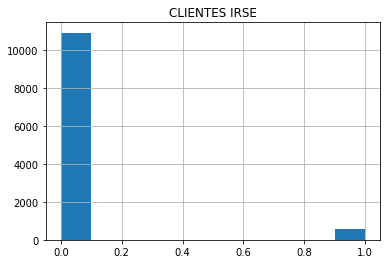

<Figure size 432x288 with 0 Axes>

In [411]:
plt.title('CLIENTES IRSE')
plt.hist(predicted_clientes_leave_dt, bins = 10)
plt.grid(True)
plt.show()
plt.clf()

In [412]:
clientesAIrsedt = predicted_clientes_leave_dt[predicted_clientes_leave_dt > 0.5]
clientesAIrsedt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [413]:
clientesAIrsedt.shape

(582,)

<font color="ORANGE">  DECIDIMOS QUE EL 50% ES EL VALOR DETERMINANTE PARA CONSIDERAR QUE UN CLIENTE SE VAYA, YA QUE SI LO PASA HABRÁ MÁS PROBABILIDAD DE IRSE QUE DE QUEDARSE.
    
EN ESE ORDEN DE IDEAS CON EL MODELO DE ARBOL COMPLETO CON ACCURACY DE 82.7% PUDIMOS DETECTAR QUE HAY 582 CLIENTES CON RIESGO DE RETIRARSE DE LA COMPAÑÍA.
</font>

## <font color="GREEN"> ARBOL PREPODADO </font>

Vamos a ver que hubiera pasado si limitamos el crecimiento del árbol (prepoda), controlando la profundidad del árbol y el mínimo número de registros de un nodo para permitir el particionamiento.

Modifiquen el parámetro **criterion** y los parámetros de pre-poda buscando una mejor exactitud del modelo:
- **max_depth**: entre mas grande el valor, el árbol será más complejo (más número de niveles de profundidad)
- **min_samples_split**: entre mas grande el valor, el árbol será más sencillo (se necesita tener más registros en un nodo para poder particionarlo)
- **min_samples_leaf**: entre mas grande el valor, el árbol será más sencillo (se necesita tener más registros en una hoja para poder aceptarla, si no se llega a esa cardinalidad, no se permite el partionamiento de su nodo padre) 
- **min_impurity_decrease**: entre mas grande el valor, el árbol será más sencillo (un nivel de impureza bajo inferior a este umbral no desatará un particionamiento. 

In [610]:
np.random.seed(1234)
ctree_podado = tree.DecisionTreeClassifier(
    criterion = 'entropy' ,#el criterio de particionamiento de un conjunto de datos
    max_depth = 13,  #prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split = 2, #prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf = 1 , #prepoda: el mínimo número de registros en una hoja
    random_state = None ,  #semilla del generador aleatorio utilizado para 
    max_leaf_nodes = None ,#prepoda: máximo número de nodos hojas
    min_impurity_decrease = 0.0, #prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight = None    #permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)

In [611]:
v_independientes_dt_podado = ['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']
v_dependientes_dt_podado = ['ESTADO']

In [612]:
d_independientes_dt_podado = d_normalizadoSupervisado[v_independientes_dt_podado]
d_dependientes_dt_podado = d_normalizadoSupervisado[v_dependientes_dt_podado]

In [613]:
d_independientes_dt_podado.head(3)

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,-0.269711,0.346947,0.173071,0.126568,-1.038535,-0.981457,-0.751290,-1.405904
1,1.373920,2.138569,1.127662,-0.083795,-0.839666,-1.092278,0.347870,-0.701241
2,-1.467515,-1.290870,-1.153232,0.968021,1.021179,2.386994,-0.963177,1.060419


In [614]:
d_dependientes_dt_podado.head(3)

,ESTADO
0,0
1,0
2,1


In [615]:
d_dependientes_dt_podado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23158 entries, 0 to 23161
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ESTADO  23158 non-null  int64
dtypes: int64(1)
memory usage: 361.8 KB


**Usaremos el <font color="RED"> PROTOCOLO HOLDOUT</font> estratificado <font color="RED"> 70% training</font> y <font color="RED"> 30% test</font> >>**

In [616]:
X_train_dt_podado, X_test_dt_podado, y_train_dt_podado, y_test_dt_podado = train_test_split(d_independientes_dt_podado, d_dependientes_dt_podado, test_size = 0.3, random_state = 1234, stratify = d_dependientes_dt_podado)

In [617]:
ctree_podado.fit(X_train_dt_podado, y_train_dt_podado)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [618]:
ctree_podado.feature_importances_

array([0.02134997, 0.02888403, 0.02049196, 0.01742007, 0.02350655,
       0.02433515, 0.02423583, 0.83977643])

In [620]:
X_train_dt_podado.columns[np.argsort(-ctree.feature_importances_)]

Index(['SATISFACCION', 'INGRESOS', 'PRECIO_DISPOSITIVO', 'CASA', 'SOBRECARGO',
       'SALDO_RESTANTE', 'MESES', 'DURACION'],
      dtype='object')

Se puede observar que **SATISFACCION** es la variable de mayor importancia (84%), quiere decir que es la variable con la cual se puede empezar a dividir el arbol de la manera más eficiente.

In [622]:
train_y_pred_dt_podado = ctree_podado.predict(X_train_dt_podado)
test_y_pred_dt_podado = ctree_podado.predict(X_test_dt_podado)
print(train_y_pred_dt_podado.shape)
print(test_y_pred_dt_podado.shape)

(16210,)
(6948,)


In [623]:
print("MSE (train): %.4f" % mean_squared_error(y_train_dt_podado, train_y_pred_dt_podado))
print("MSE (test) : %.4f" % mean_squared_error(y_test_dt_podado, test_y_pred_dt_podado))
print('R2  (train): %.4f' % r2_score(y_train_dt_podado, train_y_pred_dt_podado))
print('R2  (test) : %.4f' % r2_score(y_test_dt_podado, test_y_pred_dt_podado))

MSE (train): 0.0799
MSE (test) : 0.1068
R2  (train): 0.6804
R2  (test) : 0.5728


In [680]:
r2_aj_train = 1 - (1-r2_score(y_train_dt_podado, train_y_pred_dt_podado))*(len(y_train_dt_podado)-1) / (len(y_train_dt_podado) - X_train_dt_podado.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(y_test_dt_podado, test_y_pred_dt_podado))*(len(y_test_dt_podado)-1) / (len(y_test_dt_podado) - X_test_dt_podado.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

R2 adj (train): 0.6803
R2 adj (test): 0.5723


In [624]:
cm = metrics.confusion_matrix(y_test_dt_podado,test_y_pred_dt_podado)
print(cm)

[[3097  351]
 [ 391 3109]]


In [625]:
print("Exactitud: ", metrics.accuracy_score(y_test_dt_podado, test_y_pred_dt_podado))
print("Kappa    : ", metrics.cohen_kappa_score(y_test_dt_podado, test_y_pred_dt_podado))
print("Precisión     : ", metrics.precision_score(y_test_dt_podado, test_y_pred_dt_podado, d_dependientes_dt_podado.ESTADO==0 , average='macro'))
print("Recall        : ", metrics.recall_score(y_test_dt_podado, test_y_pred_dt_podado, d_dependientes_dt_podado.ESTADO==0 , average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test_dt_podado, test_y_pred_dt_podado, d_dependientes_dt_podado.ESTADO==0 , average='macro'))

Exactitud:  0.8932066781807715
Kappa    :  0.7864197980949603
Precisión     :  0.8931890415746847
Recall        :  0.893280181799638
Especificidad :  0.8985549132947976
F1-score      :  0.8932050056353192


Luego de tunear los parámetros del arbol con prepoda de manera **MANUAL** pudimos observar que el accuracy mejora hasta el **89.3%**, obtuvimos este valor solo variando el parámetro **max_depth** entre 5 - 15 . Por lo tanto decidimos dejar como parametros de este arbol podado una de las  configuraciones que nos arroja este **ACCURACY**  alto. 

<font color="ORANGE"> EN ARBOLES DE DECISIÓN CON EL ARBOL PREPODA TENEMOS UN ACCURACY DEL 89.3% </font>

## <font color="GREEN"> EVALUACIÓN DEL ARBOL PREPODADO </font>

Ya tenemos el modelo "aprendido" con el dataset de 23158 instancias. Vamos ahora a evaluarlo sobre ese mismo dataset para poder ver los éxitos y errores de la predicción.

Ahora vamos a evaluar el modelo. Recordemos que la idea es identificar los clientes propensos a irse a las de la empresas el próximo año.

Por tal motivo solo le pasaremos al **TEST** el dataset filtrado con los clientes que esten en condición de **VINCULADO**

In [626]:
d_test_dt_podadoo = d.copy()

In [627]:
scaler3 = preprocessing.StandardScaler()

In [628]:
d_test_dt_podadoo.columns

Index(['ESTADO', 'INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')

In [629]:
d_test_dt_podadoo[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']] = scaler3.fit_transform(d_test_dt_podadoo[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']])

In [630]:
d_test_dt_podadoo = d_test_dt_podadoo[d_test_dt_podadoo.ESTADO == "VINCULADO"]

In [631]:
d_test_dt_podadoo.head(3)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,-0.269711,0.346947,0.173071,0.126568,-1.038535,-0.981457,-0.751290,-1.405904
1,VINCULADO,1.373920,2.138569,1.127662,-0.083795,-0.839666,-1.092278,0.347870,-0.701241
5,VINCULADO,0.890297,-0.607060,-1.025722,-0.364280,-1.052740,-1.092278,0.960354,-1.405904


Entonces ya no necesitamos la columna **ESTADO**, porque todos nuestros registros son de **CLIENTES VINCULADOS**, así que la borramos.

In [632]:
d_test_dt_podadoo = d_test_dt_podadoo.drop('ESTADO', axis=1)

In [633]:
d_test_dt_podadoo.head(2)

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,-0.269711,0.346947,0.173071,0.126568,-1.038535,-0.981457,-0.75129,-1.405904
1,1.373920,2.138569,1.127662,-0.083795,-0.839666,-1.092278,0.34787,-0.701241


In [634]:
d_test_dt_podadoo.shape

(11494, 8)

In [635]:
predicted_clientes_leave_dt_podadoo = ctree_podado.predict(d_test_dt_podadoo)

In [636]:
predicted_clientes_leave_dt_podadoo

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

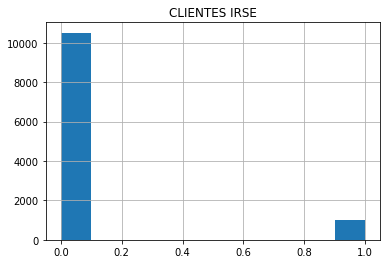

<Figure size 432x288 with 0 Axes>

In [637]:
plt.title('CLIENTES IRSE')
plt.hist(predicted_clientes_leave_dt_podadoo, bins = 10)
plt.grid(True)
plt.show()
plt.clf()

In [638]:
clientesAIrsePodadoo = predicted_clientes_leave_dt_podadoo[predicted_clientes_leave_dt_podadoo > 0.5]
clientesAIrsePodado

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [639]:
clientesAIrsePodadoo.shape

(985,)

<font color="ORANGE"> DECIDIMOS QUE EL 50% ES EL VALOR DETERMINANTE PARA CONSIDERAR QUE UN CLIENTE SE VAYA, YA QUE SI LO PASA HABRÁ MÁS PROBABILIDAD DE IRSE QUE DE QUEDARSE.

EN ESE ORDEN DE IDEAS CON EL MODELO DE ARBOL PREPODADO CON ACCURACY DEL 89.3% PUDIMOS DETECTAR QUE HAY 985 CLIENTES CON RIESGO DE RETIRARSE DE LA COMPAÑÍA </font>

####  >> <font color="BLUE"> CONCLUSIÓN DE AMBOS MODELOS  </font> <<

<font color="ORANGE"> SE PUDO OBSERVAR QUE EL ARBOL CON PREPODA ARROJA UN MEJOR ACCURACCY (89.3%) Y UN MEJOR KAPPA (78.6%) QUE EL MODELO QUE USABA EL ARBOL COMPLETO CON ACCURACY (82.5%) Y UN KAPPA (65.4%). POR ENDE ES MÁS CONFIABLE CON LOS VALORES QUE ARROJA EN CUANTO A LOS CIENTES PROPENSOS A IRSE. </font>

## <font color="GREEN"> KNN </font> ##

## <font color="GREEN"> CON TODAS LAS VARIABLES </font> ##

Antes de hacer el KNN, debemos estimar el K que vamos a usar, y la manera de hacerlo es haciendo un **TUNNING** de varios valores para K, y observar cual se comporta de la mejor manera, para posteriormente utilizarlo en nuestro KNN.

In [711]:
from sklearn.neighbors import KNeighborsClassifier

In [712]:
v_independientes_knn = ['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']
v_dependientes_knn = ['ESTADO']

In [713]:
d_independientes_knn = d_normalizadoSupervisado[v_independientes_knn]
d_dependientes_knn = d_normalizadoSupervisado[v_dependientes_knn]

Necesitamos 1d array para poder probar el KNN, así que pasamos **d_dependientes_knn** a 1D array

In [714]:
d_ndarray_knn = d_dependientes_knn.values

In [715]:
d_ndarray_knn = d_ndarray_knn.ravel()

In [716]:
d_independientes_knn.head(3)

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,-0.269711,0.346947,0.173071,0.126568,-1.038535,-0.981457,-0.751290,-1.405904
1,1.373920,2.138569,1.127662,-0.083795,-0.839666,-1.092278,0.347870,-0.701241
2,-1.467515,-1.290870,-1.153232,0.968021,1.021179,2.386994,-0.963177,1.060419


In [717]:
d_dependientes_knn.head(3)

,ESTADO
0,0
1,0
2,1


In [718]:
d_dependientes_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23158 entries, 0 to 23161
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ESTADO  23158 non-null  int64
dtypes: int64(1)
memory usage: 361.8 KB


**Usaremos el <font color="RED"> PROTOCOLO HOLDOUT</font> estratificado <font color="RED"> 70% training</font> y <font color="RED"> 30% test</font> >>**

In [719]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(d_independientes_knn, d_ndarray_knn, test_size = 0.3, random_state = 1234, stratify = d_ndarray_knn)

In [720]:
ks=[1,3,5,7,9,11, 13, 15, 17, 19, 21]

Los valores de K que vamos a probar.

In [721]:
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    y_pred_knn = knn.predict(X_test_knn)
    print("Con K = ", k, ", exactitud: ", metrics.accuracy_score(y_test_knn, y_pred_knn))

Con K =  1 , exactitud:  0.8317501439263097
Con K =  3 , exactitud:  0.8875935521013241
Con K =  5 , exactitud:  0.9035693724812895
Con K =  7 , exactitud:  0.9083189407023604
Con K =  9 , exactitud:  0.9097582037996546
Con K =  11 , exactitud:  0.9100460564191134
Con K =  13 , exactitud:  0.9103339090385723
Con K =  15 , exactitud:  0.9103339090385723
Con K =  17 , exactitud:  0.9103339090385723
Con K =  19 , exactitud:  0.9103339090385723
Con K =  21 , exactitud:  0.9103339090385723


Podemos observar que el **ACCURACY** del K va aumentando a medida que aumenta el valor de K, pero a partir del **K = 13** la exactitud es la misma para los valores de K siguientes a 13, por tanto vamos a escoger como mejor K donde se empiezan a comportar de manera similar, es decir **K = 13**.

Ahora si podemos realizar nuestro KNN con el mejor K que encontramos.

In [722]:
k=13
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [723]:
train_y_pred_knn = knn.predict(X_train_knn)
test_y_pred_knn = knn.predict(X_test_knn)
print(train_y_pred_knn.shape)
print(test_y_pred_knn.shape)

(16210,)
(6948,)


**A continuación las <font color="RED"> MÉTRICAS </font> del modelo >>**

In [726]:
print("MSE (train): %.4f" % mean_squared_error(y_train_knn, train_y_pred_knn))
print("MSE (test) : %.4f" % mean_squared_error(y_test_knn, test_y_pred_knn))
print('R2  (train): %.4f' % r2_score(y_train_knn, train_y_pred_knn))
print('R2  (test) : %.4f' % r2_score(y_test_knn, test_y_pred_knn))

MSE (train): 0.0961
MSE (test) : 0.0897
R2  (train): 0.6158
R2  (test) : 0.6413


In [764]:
r2_aj_train = 1 - (1-r2_score(y_train_knn, train_y_pred_knn))*(len(y_train_knn)-1) / (len(y_train_knn) - X_train_knn.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(y_test_knn, test_y_pred_knn))*(len(y_test_knn)-1) / (len(y_test_knn) - X_test_knn.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

R2 adj (train): 0.6156
R2 adj (test): 0.6409


In [765]:
cm = metrics.confusion_matrix(y_test_knn, test_y_pred_knn)
print(cm)

[[3164  284]
 [ 339 3161]]


In [766]:
print("Exactitud: ", metrics.accuracy_score(y_test_knn, test_y_pred_knn))
print("Kappa    : ", metrics.cohen_kappa_score(y_test_knn, test_y_pred_knn))
print("-------------------------------------")
print("Metricas para la categoría  vinculado")
print("Precisión     : ", metrics.precision_score(y_test_knn, test_y_pred_knn, d_dependientes_knn.ESTADO==0, average='macro'))
print("Recall        : ", metrics.recall_score(y_test_knn, test_y_pred_knn,  d_dependientes_knn.ESTADO==0, average='macro'))
VN = np.sum(cm[1:2,1:2])
FP = np.sum(cm[0,1:2])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test_knn, test_y_pred_knn,  d_dependientes_knn.ESTADO==0, average='macro'))

Exactitud:  0.9103339090385723
Kappa    :  0.8206790212959518
-------------------------------------
Metricas para la categoría  vinculado
Precisión     :  0.9103411260792529
Recall        :  0.9104413205841683
Especificidad :  0.9175616835994195
F1-score      :  0.910334176530721


<font color="ORANGE"> EN KNN USANDO EL MEJOR K Y TODAS LAS VARIABLES, TENEMOS UN ACCURACY DEL 91% </font>

## <font color="GREEN"> CON VARIABLES REPRESENTATIVAS</font> ##

In [733]:
v_independientes_knn_R = ['SOBRECARGO','SATISFACCION','INGRESOS','SALDO_RESTANTE']
v_dependientes_knn_R = ['ESTADO']

In [734]:
d_independientes_knn_R = d_normalizadoSupervisado[v_independientes_knn_R]
d_dependientes_knn_R = d_normalizadoSupervisado[v_dependientes_knn_R]

Necesitamos 1d array para poder probar el KNN, así que pasamos **d_dependientes_knn_R** a 1D array

In [735]:
d_ndarray_knn_R = d_dependientes_knn_R.values

In [736]:
d_ndarray_knn_R = d_ndarray_knn_R.ravel()

In [737]:
d_independientes_knn_R.head(3)

,SOBRECARGO,SATISFACCION,INGRESOS,SALDO_RESTANTE
0,-0.981457,-1.405904,-0.269711,-0.751290
1,-1.092278,-0.701241,1.373920,0.347870
2,2.386994,1.060419,-1.467515,-0.963177


In [738]:
d_dependientes_knn_R.head(3)

,ESTADO
0,0
1,0
2,1


In [739]:
d_dependientes_knn_R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23158 entries, 0 to 23161
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ESTADO  23158 non-null  int64
dtypes: int64(1)
memory usage: 361.8 KB


**Usaremos el <font color="RED"> PROTOCOLO HOLDOUT</font> estratificado <font color="RED"> 70% training</font> y <font color="RED"> 30% test</font> >>**

In [740]:
X_train_knn_R, X_test_knn_R, y_train_knn_R, y_test_knn_R = train_test_split(d_independientes_knn_R, d_ndarray_knn_R, test_size = 0.3, random_state = 1234, stratify = d_ndarray_knn_R)

In [741]:
ksR=[1,3,5,7,9,11, 13, 15, 17, 19, 21]

Los valores de K que vamos a probar

In [742]:
for k in ksR:
    knn_R = KNeighborsClassifier(n_neighbors=k)
    knn_R.fit(X_train_knn_R, y_train_knn_R)
    y_pred_knn_R = knn_R.predict(X_test_knn_R)
    print("Con K = ", k, ", exactitud: ", metrics.accuracy_score(y_test_knn_R, y_pred_knn_R))

Con K =  1 , exactitud:  0.828727691421992
Con K =  3 , exactitud:  0.8867299942429476
Con K =  5 , exactitud:  0.9040011514104779
Con K =  7 , exactitud:  0.9086067933218193
Con K =  9 , exactitud:  0.9100460564191134
Con K =  11 , exactitud:  0.9103339090385723
Con K =  13 , exactitud:  0.9104778353483016
Con K =  15 , exactitud:  0.9103339090385723
Con K =  17 , exactitud:  0.9103339090385723
Con K =  19 , exactitud:  0.9103339090385723
Con K =  21 , exactitud:  0.9103339090385723


Podemos observar que el **ACCURACY** del K va aumentando a medida que aumenta el valor de K, pero a partir del **K = 13** la exactitud es la misma para los valores de K siguientes a 13, por tanto vamos a escoger como mejor K donde se empiezan a comportar de manera similar, es decir **K = 13**.

Ahora si podemos realizar nuestro KNN con el mejor K que encontramos.

In [743]:
kR=13
knn_R = KNeighborsClassifier(n_neighbors=k)
knn_R.fit(X_train_knn_R, y_train_knn_R)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [744]:
train_y_pred_knn_R = knn_R.predict(X_train_knn_R)
test_y_pred_knn_R = knn_R.predict(X_test_knn_R)
print(train_y_pred_knn_R.shape)
print(test_y_pred_knn_R.shape)

(16210,)
(6948,)


**A continuación las <font color="RED"> MÉTRICAS </font> del modelo >>**

In [745]:
print("MSE (train): %.4f" % mean_squared_error(y_train_knn_R, train_y_pred_knn_R))
print("MSE (test) : %.4f" % mean_squared_error(y_test_knn_R, test_y_pred_knn_R))
print('R2  (train): %.4f' % r2_score(y_train_knn_R, train_y_pred_knn_R))
print('R2  (test) : %.4f' % r2_score(y_test_knn_R, test_y_pred_knn_R))

MSE (train): 0.0961
MSE (test) : 0.0897
R2  (train): 0.6155
R2  (test) : 0.6413


In [767]:
r2_aj_train = 1 - (1-r2_score(y_train_knn_R, train_y_pred_knn_R))*(len(y_train_knn_R)-1) / (len(y_train_knn_R) - X_train_knn_R.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(y_test_knn_R, test_y_pred_knn_R))*(len(y_test_knn_R)-1) / (len(y_test_knn_R) - X_test_knn_R.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

R2 adj (train): 0.6154
R2 adj (test): 0.6411


In [746]:
cm = metrics.confusion_matrix(y_test_knn_R, test_y_pred_knn_R)
print(cm)

[[3164  284]
 [ 339 3161]]


In [747]:
print("Exactitud: ", metrics.accuracy_score(y_test_knn_R, test_y_pred_knn_R))
print("Kappa    : ", metrics.cohen_kappa_score(y_test_knn_R, test_y_pred_knn_R))
print("-------------------------------------")
print("Metricas para la categoría  vinculado")
print("Precisión     : ", metrics.precision_score(y_test_knn_R, test_y_pred_knn_R, d_dependientes_knn_R.ESTADO==0, average='macro'))
print("Recall        : ", metrics.recall_score(y_test_knn_R, test_y_pred_knn_R,  d_dependientes_knn_R.ESTADO==0, average='macro'))
VN = np.sum(cm[1:2,1:2])
FP = np.sum(cm[0,1:2])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test_knn_R, test_y_pred_knn_R,  d_dependientes_knn_R.ESTADO==0, average='macro'))

Exactitud:  0.9103339090385723
Kappa    :  0.8206790212959518
-------------------------------------
Metricas para la categoría  vinculado
Precisión     :  0.9103411260792529
Recall        :  0.9104413205841683
Especificidad :  0.9175616835994195
F1-score      :  0.910334176530721


<font color="ORANGE"> EN KNN USANDO EL MEJOR K Y LAS VARIABLES REPRESENTATIVAS, TENEMOS UN ACCURACY DEL 91% </font>

----------------------------DESDE AQUÍ CAMBIÉ---------------------------------------------------------------

## <font color="GREEN"> EVALUACIÓN DEL MEJOR MODELO</font>

Ahora vamos a evaluar el modelo que obtuvimos que contiene todas las variables. 

Recordemos que la idea es identificar los clientes propensos a irse a las de la empresa el próximo año.

Por tal motivo solo le pasaremos al **TEST** el dataset filtrado con los clientes que esten en condición de **VINCULADO**

In [963]:
d_test_knn = d.copy()

In [964]:
scaler4 = preprocessing.StandardScaler()

In [965]:
d_test_knn.columns

Index(['ESTADO', 'INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')

In [966]:
d_test_knn[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']] = scaler4.fit_transform(d_test_knn[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']])

In [967]:
d_test_knn = d_test_knn[d_test_knn.ESTADO == "VINCULADO"]

In [968]:
d_test_knn.head(3)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,-0.269708,0.346791,0.172082,0.126395,-1.038353,-0.981338,-0.751290,-1.323178
1,VINCULADO,1.373964,2.138351,1.125264,-0.083929,-0.839485,-1.092161,0.347906,-0.754330
5,VINCULADO,0.890329,-0.607184,-1.024942,-0.364361,-1.052557,-1.092161,0.960410,-1.246065


Entonces ya no necesitamos la columna **ESTADO**, porque todos nuestros registros son de **CLIENTES VINCULADOS**, asi que la borramos.

In [969]:
d_test_knn = d_test_knn.drop('ESTADO', axis=1)

In [970]:
d_test_knn.head(2)

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,-0.269708,0.346791,0.172082,0.126395,-1.038353,-0.981338,-0.751290,-1.323178
1,1.373964,2.138351,1.125264,-0.083929,-0.839485,-1.092161,0.347906,-0.754330


In [971]:
d_test_knn.shape

(11497, 8)

In [972]:
predicted_clientes_leave_knn = knn.predict(d_test_knn)

In [959]:
predicted_clientes_leave_knn

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

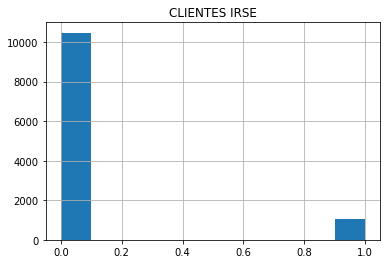

<Figure size 432x288 with 0 Axes>

In [960]:
plt.title('CLIENTES IRSE')
plt.hist(predicted_clientes_leave_knn, bins = 10)
plt.grid(True)
plt.show()
plt.clf()

In [961]:
clientesAIrse_knn = predicted_clientes_leave_knn[predicted_clientes_leave_knn > 0.5]
clientesAIrse_knn

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [962]:
clientesAIrse_knn.shape

(1028,)

####  >> <font color="BLUE"> CONCLUSION DE EVALUCIÓN MEJOR MODELO </font> <<

<font color="ORANGE"> DECIDIMOS QUE EL 50% ES EL VALOR DETERMINANTE PARA CONSIDERAR QUE UN CLIENTE SE VAYA, YA QUE SI LO PASA HABRÁ MÁS PROBABILIDAD DE IRSE QUE DE QUEDARSE.

EN ESE ORDEN DE IDEAS NUESTRO MEJOR MODELO DE KNN CON TODAS LAS VARIABLES , K=13 Y CON UN ACCURACY DEL 91% PUDO DETECTAR QUE HAY 1028 CLIENTES CON RIESGO DE RETIRARSE DE LA COMPAÑÍA </font>

## <font color="GREEN"> CONCLUSION DE LOS 3 MODELOS PREDICTIVOS </font>

4.Evalúe los 3 modelos encontrados, escoja el mejor, explicando y concluyendo lo que encontró, utilizando las métricas y protocolo definido

<font color="GREEN"> Al evaluar los 3 modelos predictivos con las métricas utilizadas, logramos darnos cuenta que el mejor modelo predictivo que identifica los clientes propensos a irse de la compañía es el **KNN**, obteniendo un mejor **ACCURACY (91%)** y **KAPPA (82%)**  que los otros dos (REGRESIÓN y ARBOL DE DECISIÓN). </font>

##  <font color="PURPLE"> PARTE 2 - ANÁLISIS NO SUPERVISADO </font> ##

## <font color="GREEN"> PCA </font> ##

PCA, nos permite simplicar el dataset encontrando una representación de baja dimensionalidad que conserve la mayor parte de la información.

También, podemos reducir el ruido de nuestra data o podemos visualizar datos que tenemos en muchas dimensiones de una manera más simple.


In [771]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Nos piden que usemos **los clientes que se han ido**, para poder crear un modelo de segmentación de los clientes que desertan de la compañía.

Para posteriormente sugerir de 3 a 5 campañas de fidelización.

Vamos a filtrar el dataset, solo nos vamos a quedar con los desertores.

In [772]:
d_nosupervisado = d[d.ESTADO == 'RETIRADO']

In [773]:
d_nosupervisado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11664 entries, 2 to 23159
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESTADO              11664 non-null  object 
 1   INGRESOS            11664 non-null  int64  
 2   CASA                11664 non-null  int64  
 3   PRECIO_DISPOSITIVO  11664 non-null  int64  
 4   MESES               11664 non-null  int64  
 5   DURACION            11664 non-null  float64
 6   SOBRECARGO          11664 non-null  float64
 7   SALDO_RESTANTE      11664 non-null  float64
 8   SATISFACCION        11664 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 911.2+ KB


In [774]:
d_nosupervisado.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
2,RETIRADO,795993,95000000,452809,38,16.8,350.610224,13.9,8
3,RETIRADO,8115015,83000000,2617184,37,17.6,230.913888,45.7,8
4,RETIRADO,8187499,677000000,666069,19,0.0,131.541983,67.2,8
6,RETIRADO,7256758,712000000,3493707,20,14.8,217.322554,69.5,8
7,RETIRADO,3262245,684000000,985708,32,1.3,275.595131,19.0,8


In [775]:
pd.crosstab(index=d["ESTADO"], columns="count")

col_0,count
ESTADO,
RETIRADO,11664
VINCULADO,11494


Podemos ver que ya tenemos el dataset con **11664** registros que corresponden solo a los clientes que están en **ESTADO** retirado.

Por lo que, para este momento, nuestra columna **ESTADO** se puede eliminar, porque solo tiene un valor posible que es **RETIRADO**.

In [776]:
d_nosupervisado = d_nosupervisado.drop('ESTADO', axis=1)

In [777]:
d_nosupervisado.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
INGRESOS,11664.0,4.817570e+06,2.738513e+06,150000.0,2.169046e+06,6.160170e+06,7.349632e+06,9.650000e+06
CASA,11664.0,7.156337e+08,4.815963e+08,81000000.0,3.560000e+08,6.225000e+08,9.092500e+08,2.109000e+09
PRECIO_DISPOSITIVO,11664.0,1.312919e+06,7.448258e+05,200000.0,6.552658e+05,1.236615e+06,1.823202e+06,4.164895e+06
MESES,11664.0,2.416752e+01,1.424870e+01,0.0,1.400000e+01,2.400000e+01,3.400000e+01,7.900000e+01
DURACION,11664.0,9.610965e+00,7.029159e+00,0.0,2.100000e+00,1.460000e+01,1.610000e+01,2.010000e+01
SOBRECARGO,11664.0,1.832374e+02,7.764626e+01,0.0,1.457279e+02,1.938206e+02,2.347768e+02,4.111684e+02
SALDO_RESTANTE,11664.0,4.311415e+01,3.031617e+01,0.0,1.530000e+01,3.850000e+01,7.020000e+01,1.307000e+02
SATISFACCION,11664.0,7.236283e+00,1.735607e+00,1.0,7.000000e+00,8.000000e+00,8.000000e+00,9.000000e+00


Nuestro dataset no supervisado sin la columna **ESTADO**

## <font color="GREEN"> NORMALIZACIÓN DE LOS DATOS </font> ##

El paso a seguir ahora es **NORMALIZAR** nuestros datos, con motivo de reescalar nuestros atributos **numéricos** (en el rango de 0 y 1) y para que todos nuestros atributos numéricos tengan la misma importancia en nuestro modelo.

In [778]:
d_normalizadoNosupervisado = d_nosupervisado.copy()

<font color="BLUE"> este el DATAFRAME NO SUPERVISADO normalizado. </font> 

In [779]:
scalerNoSupervisado = preprocessing.StandardScaler()

In [780]:
d_normalizadoNosupervisado.columns

Index(['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')

In [781]:
d_normalizadoNosupervisado[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']] = scalerNoSupervisado.fit_transform(d_normalizadoNosupervisado[['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']])

**2.Extraiga los componentes principales, analice sus niveles de varianza explicada, e interprete los 3 más importantes en función de las variables originales**. <font color="RED">  (0.6) </font> 

In [782]:
pca = PCA()
d_nosupervisadoProyectado = pca.fit_transform(d_normalizadoNosupervisado)
print(d_normalizadoNosupervisado.shape)
print(d_nosupervisadoProyectado.shape)

(11664, 8)
(11664, 8)


In [783]:
d_normalizadoNosupervisado.columns

Index(['INGRESOS', 'CASA', 'PRECIO_DISPOSITIVO', 'MESES', 'DURACION',
       'SOBRECARGO', 'SALDO_RESTANTE', 'SATISFACCION'],
      dtype='object')

Una vez ajustado el objeto PCA a nuestro dataset, podemos acceder a diferentes aspectos resultantes de la transformación:

- components_: los ejes de los componentes principales en función de las variables originales. Como teníamos 8 variables, vamos a tener 8 PCs, cada uno con las cargas (loadings) correspondientes a cada variable original (8 variables originales).

In [784]:
pca.components_

array([[ 0.64850118,  0.4191023 , -0.01650714, -0.01361658, -0.08653599,
         0.03354713,  0.62686566,  0.04203746],
       [ 0.03790263,  0.01000306, -0.02520473, -0.03232956, -0.01757643,
        -0.70589033,  0.03535857, -0.70494151],
       [-0.02939193,  0.00358025,  0.53854768,  0.21827913,  0.79689758,
        -0.0175659 ,  0.15956507, -0.02507167],
       [ 0.00775946, -0.003698  , -0.34421316,  0.9382604 , -0.02567238,
        -0.01416833,  0.00400387, -0.01532971],
       [ 0.01772485,  0.07205024,  0.76630188,  0.26575777, -0.56776729,
        -0.00571665, -0.11704458, -0.02360139],
       [-0.26392569,  0.90367009, -0.05665002, -0.01146113,  0.09103332,
        -0.00294958, -0.3191978 , -0.01414296],
       [-0.00360782,  0.00539803,  0.01194365,  0.00531017, -0.00119508,
        -0.70713441, -0.00917137,  0.70686801],
       [ 0.71211064, -0.04885393,  0.00234402,  0.00207096,  0.16077804,
         0.00191688, -0.68164609, -0.00270221]])

### <font color="BLUE">  ANÁLISIS DE LOS PCA_COMPONENTS </font>



**PC 1** - Aporte positivo importante de INGRESOS(64.9%) y SALDO RESTANTE(62.7%) 


**PC 2** - Aporte negativo importante de SOBRECARGO(-70.6%) y SATISFACCION(-70.5%) 

**PC 3** - Aporte positivo importante de PRECIO_DISPOSITIVO(53.9%) , DURACION(79.7%)

**PC 4** - Aporte importante positivo de MESES(93.8%)

**PC 5** - Aporte importante positivo de PRECIO_DISPOSITIVO(76.6%) y un aporte negativo de DURACION(-56%)

**PC 6** - Aporte importante positivo de CASA(90.4%) 

**PC 7** - Aporte importante negativo de SOBRECARGO(-70.7%) y aporte importante positivo de SATISFACCION (70.7%)

**PC 8** - Aporte importante positivo de INGRESOS (71.2%) y aporte importante negativo de SALDO RESTANTE (-68%)



Despues del análisis, procedemos a mirar :

## <font color="GREEN"> VARIANZA EXPLICADA </font> ##

- explained_variance_: la varianza explicada por cada eje en las unidades originales

In [787]:
pca.explained_variance_

array([2.08492534, 1.67699873, 1.03351728, 0.99858916, 0.98407349,
       0.7693326 , 0.3231023 , 0.13014702])

La varianza explicada determina una parte de la varianza, la cual es producida por un factor determinado.

- explained_variance_ratio_: la proporción de la varianza explicada por cada eje, en porcentaje

In [791]:
pca.explained_variance_ratio_

array([0.26059332, 0.20960687, 0.12917858, 0.12481294, 0.12299864,
       0.09615833, 0.04038432, 0.01626698])

In [792]:
var_exp = pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
cum_var_exp

array([0.26059332, 0.47020019, 0.59937878, 0.72419172, 0.84719036,
       0.94334869, 0.98373302, 1.        ])

Encontramos que los 3 primeros componentes representan el 60% de la información.

Vamos a graficarlo para verlo más en detalle :

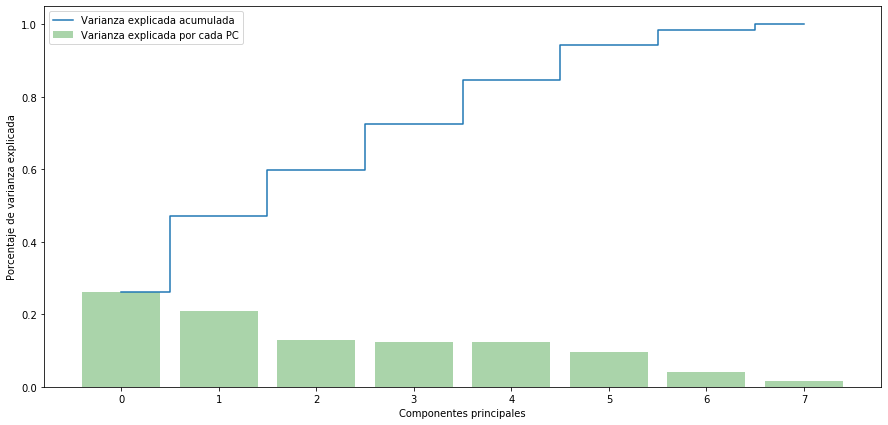

In [793]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [794]:
np.sum(pca.explained_variance_ratio_[0:3])

0.5993787782109168

In [795]:
d_nosupervisadoProyectadoUno = d_nosupervisadoProyectado[:,0:3]
d_nosupervisadoProyectadoUno.shape

(11664, 3)

In [796]:
d_nosupervisadoProyectadoUno[0:3]

array([[-2.08845614, -1.95476284,  0.24091895],
       [ 0.18337153, -0.80137526,  1.99713752],
       [ 1.39625948,  0.29136424, -1.54555307]])

Vamos a ver los puntos en el nuevo sistema de representación dado por los componentes principales. Creamos una función que permite plotear tanto los puntos de los datos como los loadings de las variables originales (tomada de https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot). Esto nos permitirá entender mejor la relación entre componentes principales y variables originales

In [797]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 10))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.5/(xs.max()- xs.min())
    scaley = 1.5/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='orange', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='orange', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1))
    plt.ylabel("PC{}".format(index2))
    plt.grid() 

Veamos como nos va con los primeros dos componentes principales:

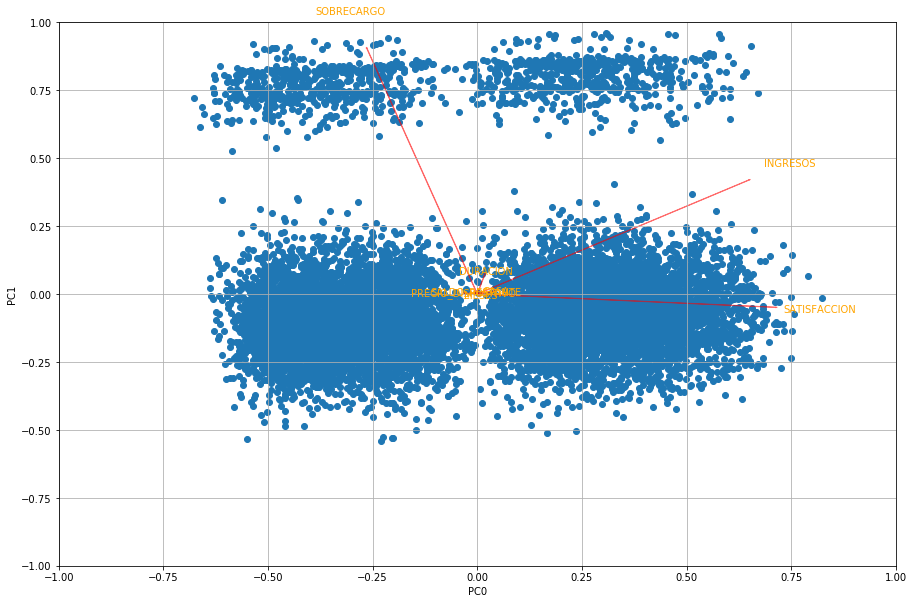

In [798]:
biplot(d_nosupervisadoProyectadoUno, pca.components_, 0, 1, d_normalizadoNosupervisado.columns)

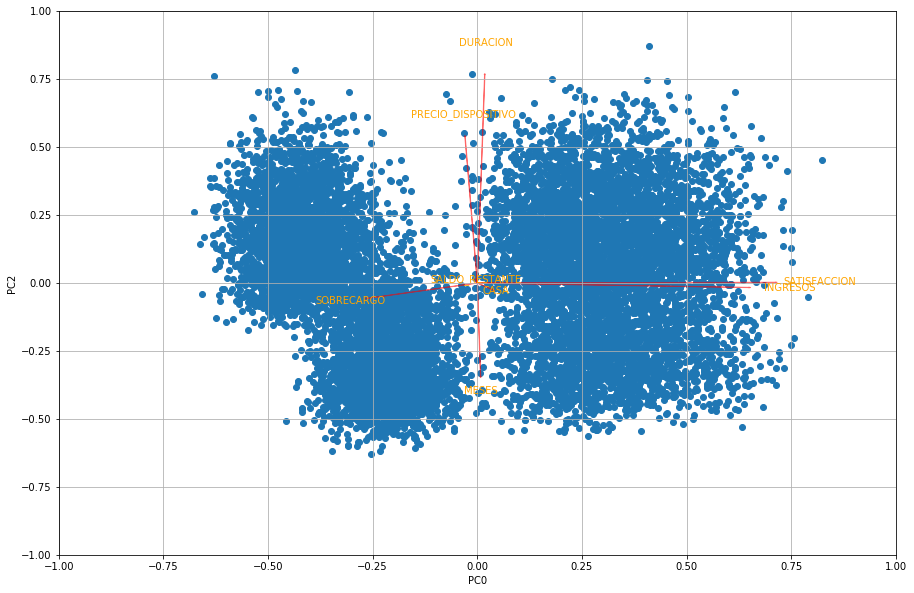

In [799]:
biplot(d_nosupervisadoProyectadoUno, pca.components_, 0, 2, d_normalizadoNosupervisado.columns)

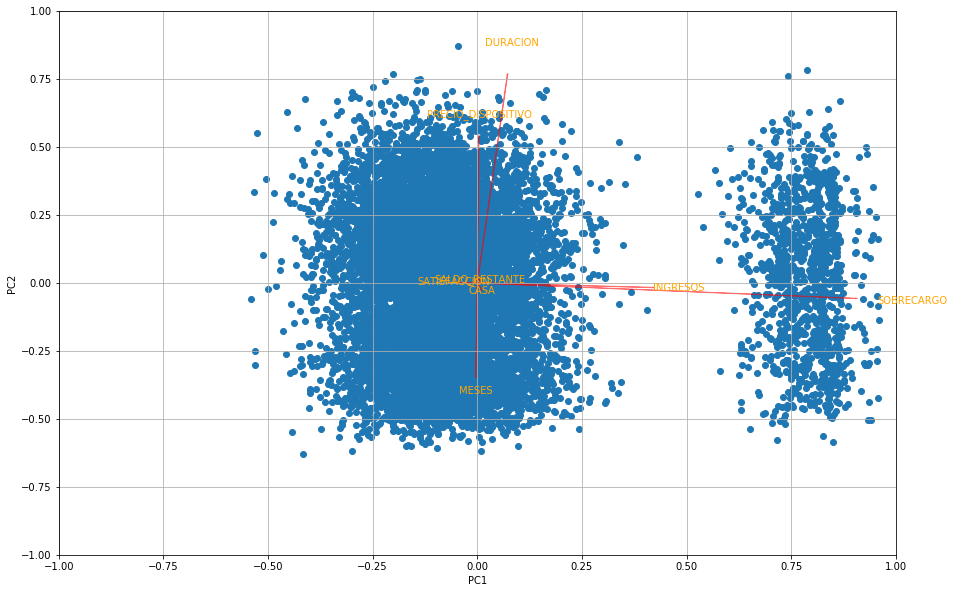

In [801]:
biplot(d_nosupervisadoProyectadoUno, pca.components_, 1, 2, d_normalizadoNosupervisado.columns)

## <font color="GREEN"> INTERPRETACIÓN DE PC0, PC1 Y PC2 </font> ##

PODEMOS DECIR QUE :

- El componente PC0 representa positivamente SATIFACCION e INGRESOS y negativamente SOBRECARGO, Son los clientes con mayores INGRESOS y con mayor SATISFACCION pero con negativo SOBRECARGO. Este perfil de cliente podría ser **EJECUTIVOS**.


- El componente PC1 representa positivamente INGRESOS y SOBRECARGO, Son los clientes con mayores INGRESOS y con mayor SOBRECARGO, por lo tanto creemos que este perfil de cliente podrían ser **COMERCIANTES**


- El componente PC2 representa positivamente PRECIO_DISPOSITIVO y DURACION y negativamente MESES, Son los clientes con mayor PRECIO_DISPOSITIVO y mayor DURACION en las llamadas pero lleva muy pocos MESES asociado. Este perfil de cliente podría ser el de un **ADOLESCENTES UNIVERSITARIOS** y **ADULTOS JOVENES**


Ahora que ya entendemos el significado de los componentes principales, podemos proseguir a un clustering de los registros en el espacio reducido

## <font color="GREEN"> CLUSTERING </font> ##

## <font color="GREEN"> K-MEANS </font> ##

In [803]:
dPCA = pd.DataFrame(d_nosupervisadoProyectadoUno)
dPCA.columns=['PC0', 'PC1', 'PC2']

In [821]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dPCA)
clusters = kmeans.labels_

In [822]:
dPCA['Cluster'] = clusters
counter=Counter(clusters)
print(counter)

Counter({0: 5359, 2: 5151, 1: 1154})


In [823]:
var_num = dPCA.columns

C:\Users\prestamo\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\prestamo\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\prestamo\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


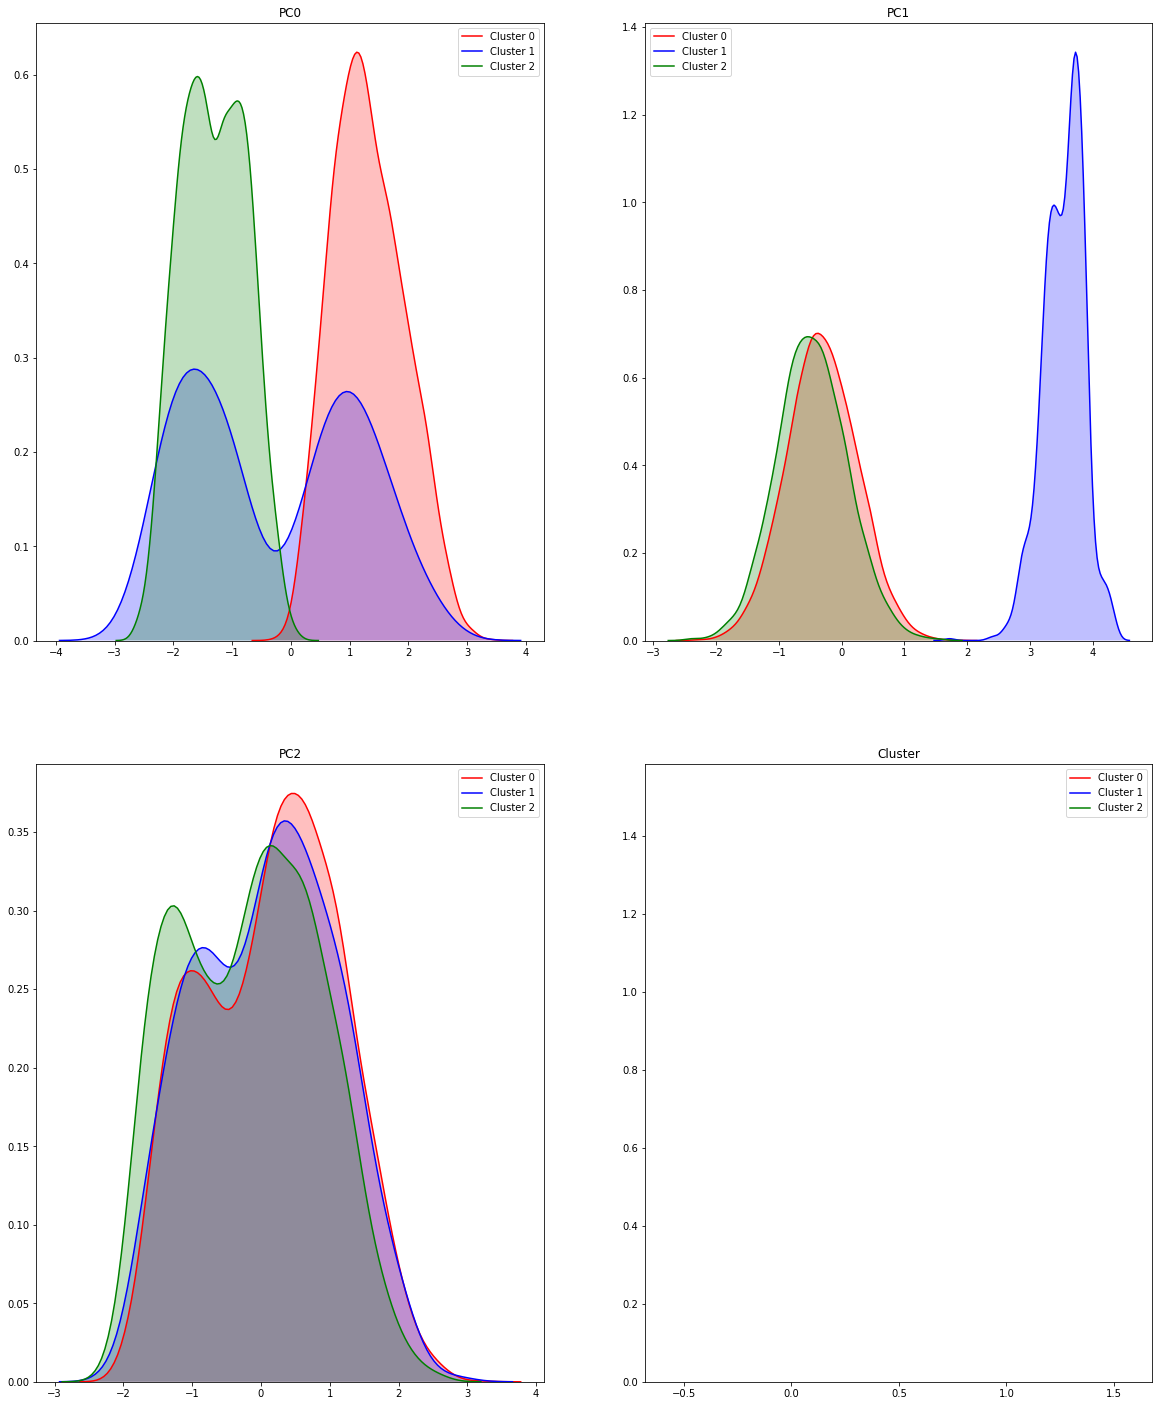

In [826]:
fig = plt.figure(figsize=(20,25))
i=1
for var in dPCA.columns[0:4]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dPCA.loc[dPCA.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dPCA.loc[dPCA.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dPCA.loc[dPCA.Cluster==2][var], shade=True, color='g', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

Vemos que con K=3 

El **PC0** sirve para separar bien los 3

El **PC1** sirve para distinguir el cluster AZUL

El **PC2** no permite visualizar de manera optima algún cluster


In [827]:
kmeans.inertia_

21252.218902476136

In [828]:
kmeans.init

'k-means++'

## <font color="GREEN"> DEFINICIÓN DEL K </font> ##

Para determinar el K nos basaremos en dos métodos, 

- método del CODO.
- método de Calinski-Harabaz.

### <font color="BLUE">  MÉTODO DEL CODO </font>

A partir de los valores de WSS se puede crear el plot a partir del cual se aplica la técnica del codo, creando un clustering para diferentes valores de K. Veamos, según el método del codo, cual sería el valor del K en este conjunto de datos

In [829]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dPCA)
    WSSs.append(km.inertia_)
WSSs

[66435.52336174491,
 36398.92527976553,
 21252.21890247614,
 16635.456177966775,
 12829.777956515381,
 10797.536927834932,
 9915.869825177902,
 9209.539475824171,
 8522.913418586979,
 7992.785731952656,
 7517.598112403544,
 7127.265098809566,
 6705.224133572345,
 6327.7101726218625]

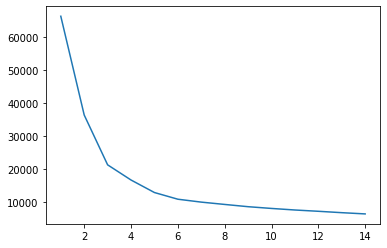

In [830]:
plt.plot(range(1, 15), WSSs)

Mediante el **método heuristico del CODO** logramos darnos cuenta que el K optimo para el **K-MEANS** es de **K=3**

### <font color="BLUE">  MÉTODO DE CALINSKI HARABAZ </font>

In [834]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dPCA)
    CH = calinski_harabaz_score(dPCA, km.labels_) 
    CHs.append(CH)
CHs

C:\Users\prestamo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\prestamo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\prestamo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\prestamo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarnin

[9623.548061919577,
 12395.941236002998,
 11635.167053963147,
 12178.491860846685,
 12014.36444638319,
 11074.045656659493,
 10346.860645133993,
 9899.473301832813,
 9468.230685290053,
 9132.96560881484,
 8814.825747788811,
 8649.034207257808,
 8512.766492793498]

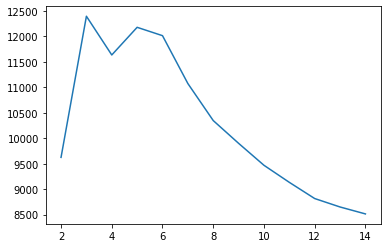

In [835]:
plt.plot(range(2, 15), CHs)

Mediante el **método heuristico de Calinski Harabaz** logramos darnos cuenta que el K óptimo para el **K-MEANS** es de **K=3**

Ahora veamos los **CLUSTERS** en scatterplots para entender mejor las diferencias:

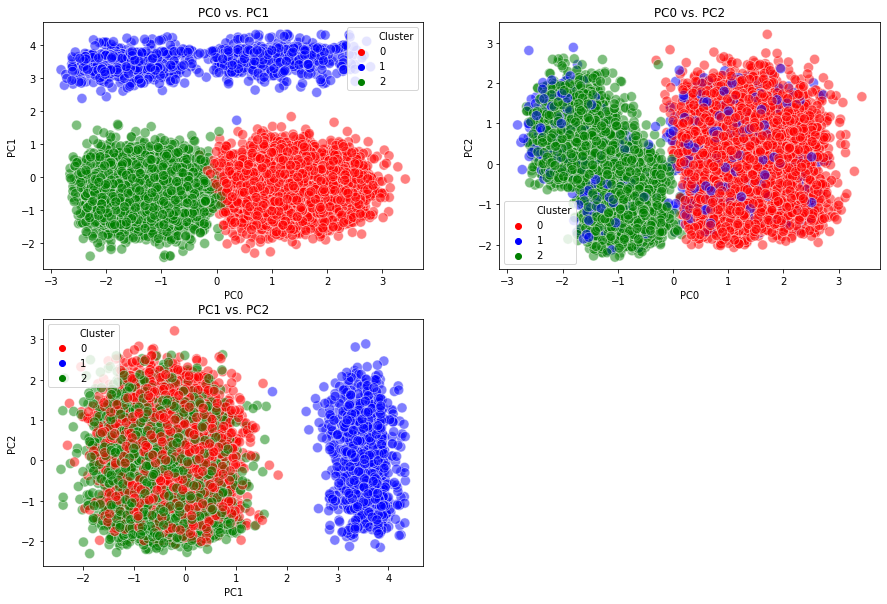

In [837]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC0", y="PC1", hue="Cluster", data=dPCA, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC0 vs. PC1")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC0", y="PC2", hue="Cluster", data=dPCA, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC0 vs. PC2")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dPCA, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
plt.show()

**AHORA VAMOS A VER LOS CLUSTER POR VARIABLE**

In [838]:
d_noSupervisadoVisualizacion = pd.DataFrame()

In [839]:
d_noSupervisadoVisualizacion = d_normalizadoNosupervisado.copy()

In [840]:
kmeans2 = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans2.fit(d_noSupervisadoVisualizacion)
clusters2 = kmeans.labels_

In [841]:
d_noSupervisadoVisualizacion['Cluster']= clusters2
counter=Counter(clusters2)
print(counter)

Counter({0: 5359, 2: 5151, 1: 1154})


In [842]:
var_num = ['INGRESOS','CASA','PRECIO_DISPOSITIVO','MESES','DURACION','SOBRECARGO','SALDO_RESTANTE','SATISFACCION']

In [843]:
import warnings
warnings.filterwarnings('ignore')

In [844]:
d_noSupervisadoVisualizacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11664 entries, 2 to 23159
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INGRESOS            11664 non-null  float64
 1   CASA                11664 non-null  float64
 2   PRECIO_DISPOSITIVO  11664 non-null  float64
 3   MESES               11664 non-null  float64
 4   DURACION            11664 non-null  float64
 5   SOBRECARGO          11664 non-null  float64
 6   SALDO_RESTANTE      11664 non-null  float64
 7   SATISFACCION        11664 non-null  float64
 8   Cluster             11664 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 865.7 KB


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

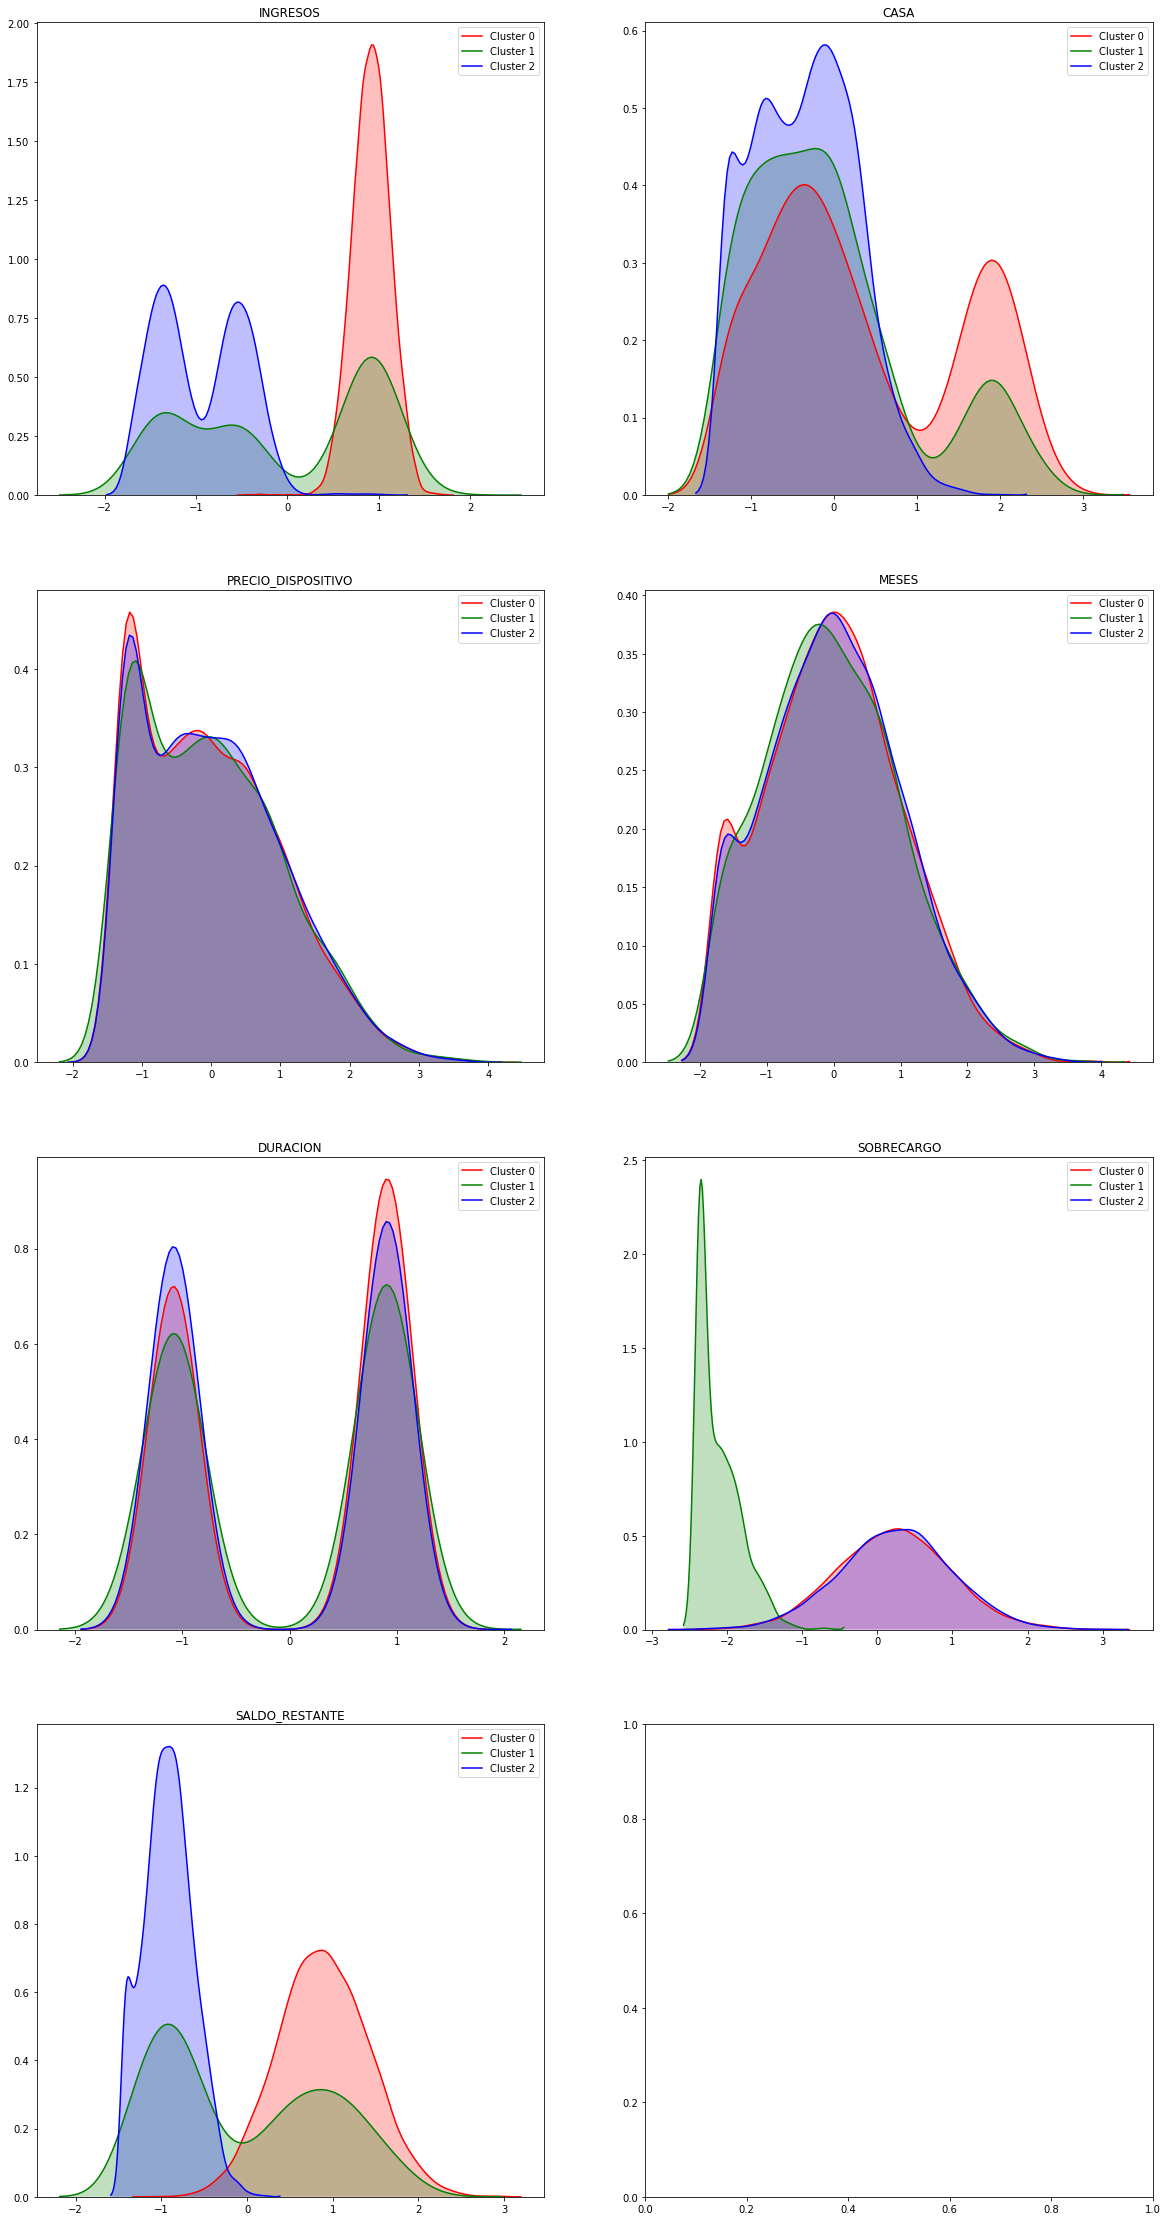

In [845]:
fig = plt.figure(figsize=(20,40))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(d_noSupervisadoVisualizacion.loc[d_noSupervisadoVisualizacion.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(d_noSupervisadoVisualizacion.loc[d_noSupervisadoVisualizacion.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(d_noSupervisadoVisualizacion.loc[d_noSupervisadoVisualizacion.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

#### <font color="BLUE"> INTERPRETACION DE LOS RESULTADOS </font>

Como podemos observar en los graficos superiores, tenemos varios graficos donde cada uno representa una variable numerica del dataset En el siguiente paso, analizaremos cada cluster embebido en cada uno de los graficos :

- Respecto a la variable **INGRESOS**, encontramos que :
            * Nuestro cluster 0, indica unos valores ALTOS. 
            * Nuestro cluster 1, indica valores BAJOS, MEDIOS y ALTOS.
            * Nuestro cluster 2, indica unos valores BAJOS. 

- Respecto a la variable **CASA**, encontramos que :
            * Nuestro cluster 0, indica valores bajos,medios y altos
            * Nuestro cluster 1, indica valores bajos,medios y altos.
            * Nuestro cluster 2, indica valores bajos,medios y altos. 

- Respecto a la variable **PRECIO_DISPOSITIVO**, encontramos que :
            * Nuestro cluster 0, indica valores bajos, medios y altos. 
            * Nuestro cluster 1, indica valores bajos, medios y altos.
            * Nuestro cluster 2, indica valores bajos, medios y altos. 

- Respecto a la variable **MESES**, encontramos que :
            * Nuestro cluster 0, indica valores bajos, medios y altos. 
            * Nuestro cluster 1, indica valores bajos, medios y altos.
            * Nuestro cluster 2, indica valores bajos, medios y altos. 

- Respecto a la variable **DURACION**, encontramos que :
            * Nuestro cluster 0, indica valores bajos y altos. 
            * Nuestro cluster 1, indica valores bajos y altos.
            * Nuestro cluster 2, indica valores bajos y altos. 

- Respecto a la variable **SOBRECARGO**, encontramos que :
            * Nuestro cluster 0, indica valores bajos, medios y altos. 
            * Nuestro cluster 1, indica valores bajos.
            * Nuestro cluster 2, indica valores bajos, medios y altos. 

- Respecto a la variable **SALDO_RESTANTE**, encontramos que :
            * Nuestro cluster 0, indica unos valores medios y altos. 
            * Nuestro cluster 1, indica valores bajos, medios y altos.
            * Nuestro cluster 2, indica valores bajos. 

In [846]:
pca.components_

array([[ 0.64850118,  0.4191023 , -0.01650714, -0.01361658, -0.08653599,
         0.03354713,  0.62686566,  0.04203746],
       [ 0.03790263,  0.01000306, -0.02520473, -0.03232956, -0.01757643,
        -0.70589033,  0.03535857, -0.70494151],
       [-0.02939193,  0.00358025,  0.53854768,  0.21827913,  0.79689758,
        -0.0175659 ,  0.15956507, -0.02507167],
       [ 0.00775946, -0.003698  , -0.34421316,  0.9382604 , -0.02567238,
        -0.01416833,  0.00400387, -0.01532971],
       [ 0.01772485,  0.07205024,  0.76630188,  0.26575777, -0.56776729,
        -0.00571665, -0.11704458, -0.02360139],
       [-0.26392569,  0.90367009, -0.05665002, -0.01146113,  0.09103332,
        -0.00294958, -0.3191978 , -0.01414296],
       [-0.00360782,  0.00539803,  0.01194365,  0.00531017, -0.00119508,
        -0.70713441, -0.00917137,  0.70686801],
       [ 0.71211064, -0.04885393,  0.00234402,  0.00207096,  0.16077804,
         0.00191688, -0.68164609, -0.00270221]])

## <font color="GREEN"> CLUSTERING JERÁRQUICO </font> ##

Scipy dispone de la función linkage que resume las diferentes fusiones realizadas (son n-1 fusiones), utilizando el método de fusión indicado como parámetro. El resultado de la función linkage es una matriz de 4 columnas:

Índice del primer cluster a fusionar
Índice del segundo cluster a fusionar
Distancia de fusión según el método indicado
Número de elementos atómicos incluidos en el cluster fusionado

In [847]:
fusiones = linkage(dPCA, 'ward')

Vemos entonces que las 5 primeras fusiones aglomeran clusters de tamaño 1 (puntos atómicos), ya que el tamaño final de la aglomeración es 2). Vemos también que las distancias de fusión de la 3a columna van a estar siempre en orden creciente; en el dendrograma se vana utilizar para definir la altura de las ramas.

In [848]:
fusiones[-5:]

array([[23312.        , 23317.        ,    63.74727561,  1153.        ],
       [23320.        , 23321.        ,    82.94278838,  5360.        ],
       [23315.        , 23319.        ,    94.56762061,  5151.        ],
       [23322.        , 23324.        ,   185.20045187,  6304.        ],
       [23323.        , 23325.        ,   236.77664298, 11664.        ]])

Vemos que en las últimas fusiones las distancias son muchísmo mas grandes, y que las aglomeraciones tienen una cardinalidad elevada, finalizando en un cluster con la última fusión de los 1000 puntos totales. Además los índices sobrepasan el valor de 1000, refiriéndose a clusters previamente aglomerados y no a elementos atómicos, siguiendo el mismo orden de aglomeración.

### Dendrogramas

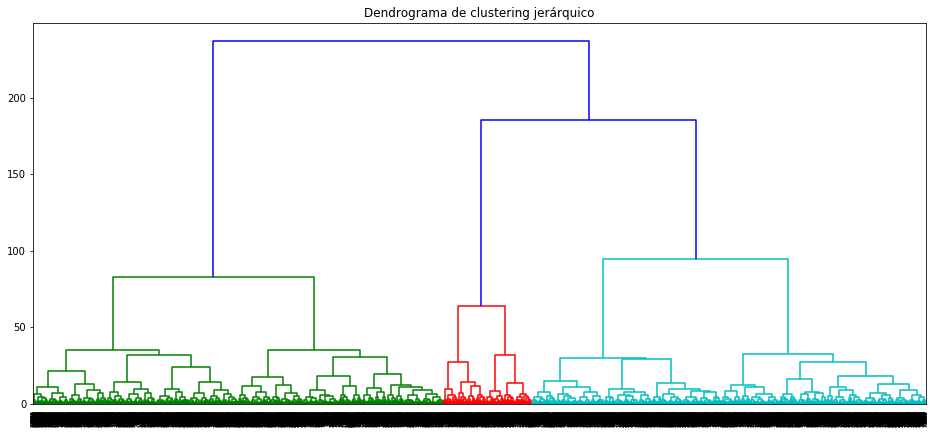

In [852]:
plt.figure(figsize=(16, 7))  
plt.title('Dendrograma de clustering jerárquico')
dendrogram(fusiones,  
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True        
          )
plt.show()

Con el **DENDOGRAMA** logramos evidenciar facilmente los **3 clusters** que se forman con nuestros **3 PC** de manera mucho más fácil que con K-Means. Ahora procederemos a desarrollar una **ESTRATEGIA** para fidelizar los clientes.


## <font color="GREEN"> ESTRATEGIAS DE FIDELIZACIÓN </font> ##



Identificamos 4 segmentos de clientes.

EJECUTIVOS, CORPORACIONES Y ESTUDIADOS -

PERSONAS CLASE MEDIA -

VENDEDOR INFORMAL INDEPENDIENTE -

PERSONAS DEL DIA A DIA -


## <font color="GREEN"> ESTRATEGIAS DE FIDELIZACIÓN Nuesra estrategia de fidelización para estos 4 segmentos de clientes se encuentran en la presentación de POWERPOINT, por cambios que hicimos a ultima hora </font> 